# **Rapport ML01**

La base de données utilisée représente une vingtaine de mesures réalisé sur une tumeur dans le cadre de la prévention et du soin du cancer du sein. Ces mesures concernent des informations de formes, de textures ou de géométries. Le but est donc de créer un classifieur permettant d'aider le praticien a réalisé son diagnostic. En 2020, le cancer du sein touche et a touché 2,3 millions de femmes et a causé le décès de 685 000 d'entre elles. Nous avons généralisé aux femmes (qui est la population de notre base de donnée) mais ce cancer touche aussi pour moins d'1% des cas des hommes (500 cas en France chaque année). Aujourd'hui, ce cancer est relativement bien soigné si et seulement si une détection est faite tôt. Ainsi, une deuxième utilité d'un procédé de machine learning dans ce contexte est "l'automatisation" des detections : permettre au praticien de gagner du temps et donc de plus consulté pour permettre a plus de femmes (et hommes) d'être diagnostiqué sous peu de temps. En effet, 35% des cas de cancer sont évitables (et beaucoup plus dans les pays où les soins sont développé comme en France).






### Statistiques descriptives :


Quelques statistiques pour décrire les données utilisées et les choix justifiées des facteurs séléctionnées.

Dans notre jeux de données, des femmes présentants une tumeur au sein ont subit des examens afin de déterminer si leur tumeur était d'origine bégnine (donc innofensive) ou maligne (cancéreuse donc dangereuse). Ces 2 modalités, que l'on notera par la suite B (bégnine) et M (maligne), seront les clases à prédire dans la suite du projet.

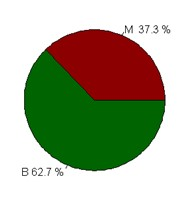

*Graphique représentant la répartition de tumeurs malignes (M) et bégnines (B) parmis les femmes présentant une tumeur dans dans cette étude.*

De nombreuses informations relatifs au sein infecté de ces patientes ont été receuillits, notamment leurs géométries et certaines propriétés méchaniques. Ces propriétés sont décrits dans notre jeux de données par 20 facteurs.

Tous ces facteurs ont été représentés ci-dessous sous forme de "boites à moustaches", avec une différentiation entre les données provenant des patientes ayant une tumeur maligne (en rouge) ou bégnine (en vert) :

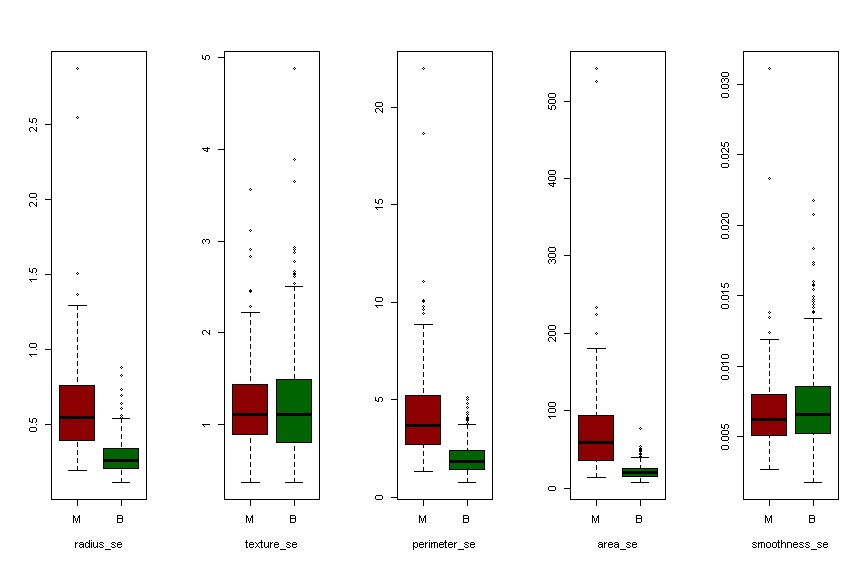


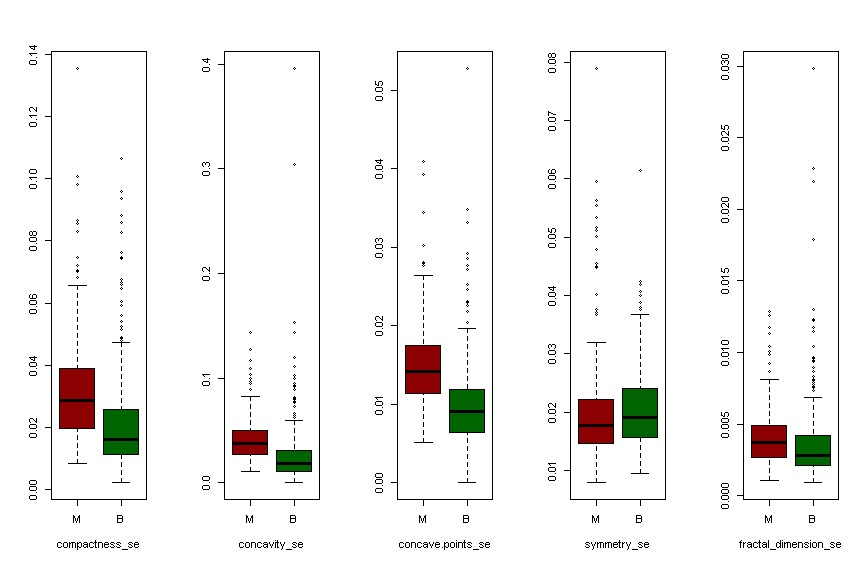


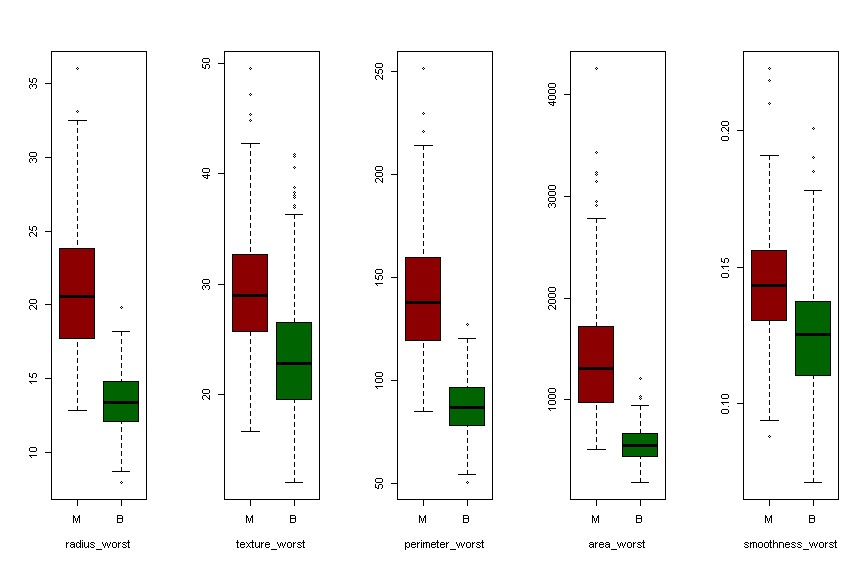


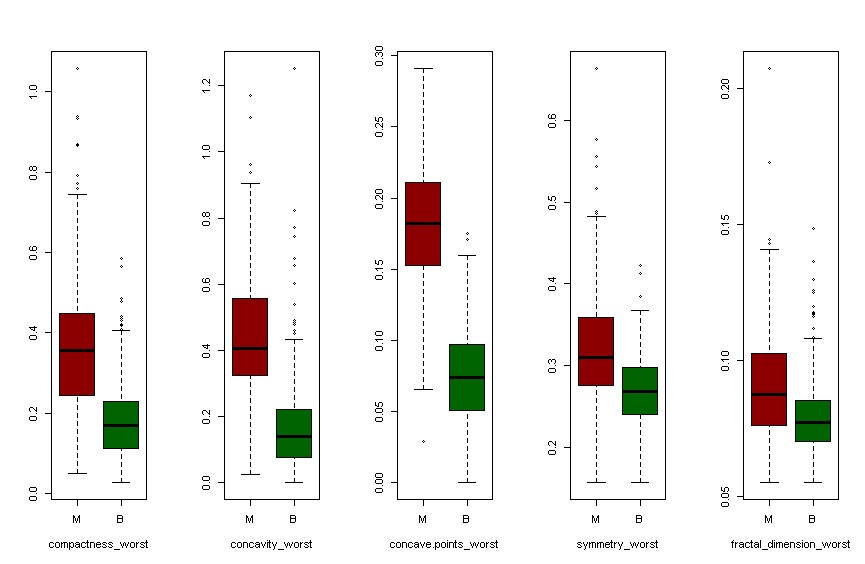


Il peut être cependant nécessaire de faire une sélection sur ce jeux de facteur pour éviter le "fléau de la dimension", nous avons alors procédé à 2 critères de sélections :

  •Significativité des éffets : les facteurs ayant trop peu d'effet sur la classe (visibles par des boxplots qui se superposent) sont écartés.
  •Corrélation des facteurs : Ici les facteurs "Area" sont corrélés avec "Perimeter" et "Radius", nous choisissons donc de ne concerver que les facteurs "Area".

Ainsi en appliquant ces critères ce sélection seul 5 facteurs sont encore en liste et seront exploités au cours de ce projet :

  •	Area_se
  •	Area_worst
  •	Compactness_worst
  •	Concavity_worst
  •	Concavepoint_worst

Les histogrammes de ces 5 facteurs, avec toujours une différentiation entre les données bégnines ou malignes sont présentés ci-dessous :


Pour les données du code, pour le random state nous avons décidé de prendre 42, state "favori" d'après les données Kaggle. Et pour les bases d'entrainement, on prendra 20%. Concernant l'optimisation, nous avons fait le choix de séparer les initialisations du tableaux et les classifieurs, cependant, dans chaque classifieur on remettra l'initialisation de la base d'entrainement. Ce choix a été fait pour que le code puisse etre utilisable quelque soit les modifications apportés au classifieur et pour permettre d'avoir un code déjà prêt à l'exécution et éviter d'avoir la confusion entre les codes avec validation croisée et ceux sans. Concernant le code, beaucoup sont inspirés des notations et des techniques que l'on a pu voir dans les exemples de la communauté, nous avons fait ça pour que le code soit plus "conventionnel" pour le domaine et la communauté du machine learning.


In [ ]:
#Ce bout de code permet l'initialisation des bibliothèque et de la base de données, à exécuter en premier obligatoirement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import permutation_test_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

df = pd.read_csv("breast-cancer.csv")

X = df.iloc[:, 2:]
X = X.to_numpy()
Y = df.iloc[:, 1]
Y = Y.to_numpy()

In [ ]:
#Ce code permet de créer un nouveau classifieur en modifiant la base de données générale en une base de données triée avec les variables les plus significatives
data = pd.read_csv("breast-cancer.csv")
selected_columns = ['diagnosis','area_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
nouv_data = data[selected_columns]
nouv_data.to_csv("NouveauTableur.csv", index=False)
print("Les colonnes sélectionnées ont été enregistrées dans 'selected_columns.csv'")


Les colonnes sélectionnées ont été enregistrées dans 'selected_columns.csv'


In [ ]:
#Ce code permet d'initialiser le nouveau tableaur triée
data = pd.read_csv("NouveauTableur.csv")
X = data.iloc[:,1:].to_numpy()
Y = data.iloc[:, 0].to_numpy()

# Matrice de corrélation
Cette matrice réprésente la corrélation des 20 variables une à une. Elle nous permet donc d'éliminer les variables corrélées entre elles pour retenir uniquement une seule variable représentative parmis celles corrélées.
La corrélation est un chiffre entre 0 et 1, 0 étant non corrélé et 1 étant completement corrélé. Ici on voit bien que sur la diagonale les variables sont corrélées avec elles-même ce qui parait normal.


<Figure size 1500x1200 with 0 Axes>

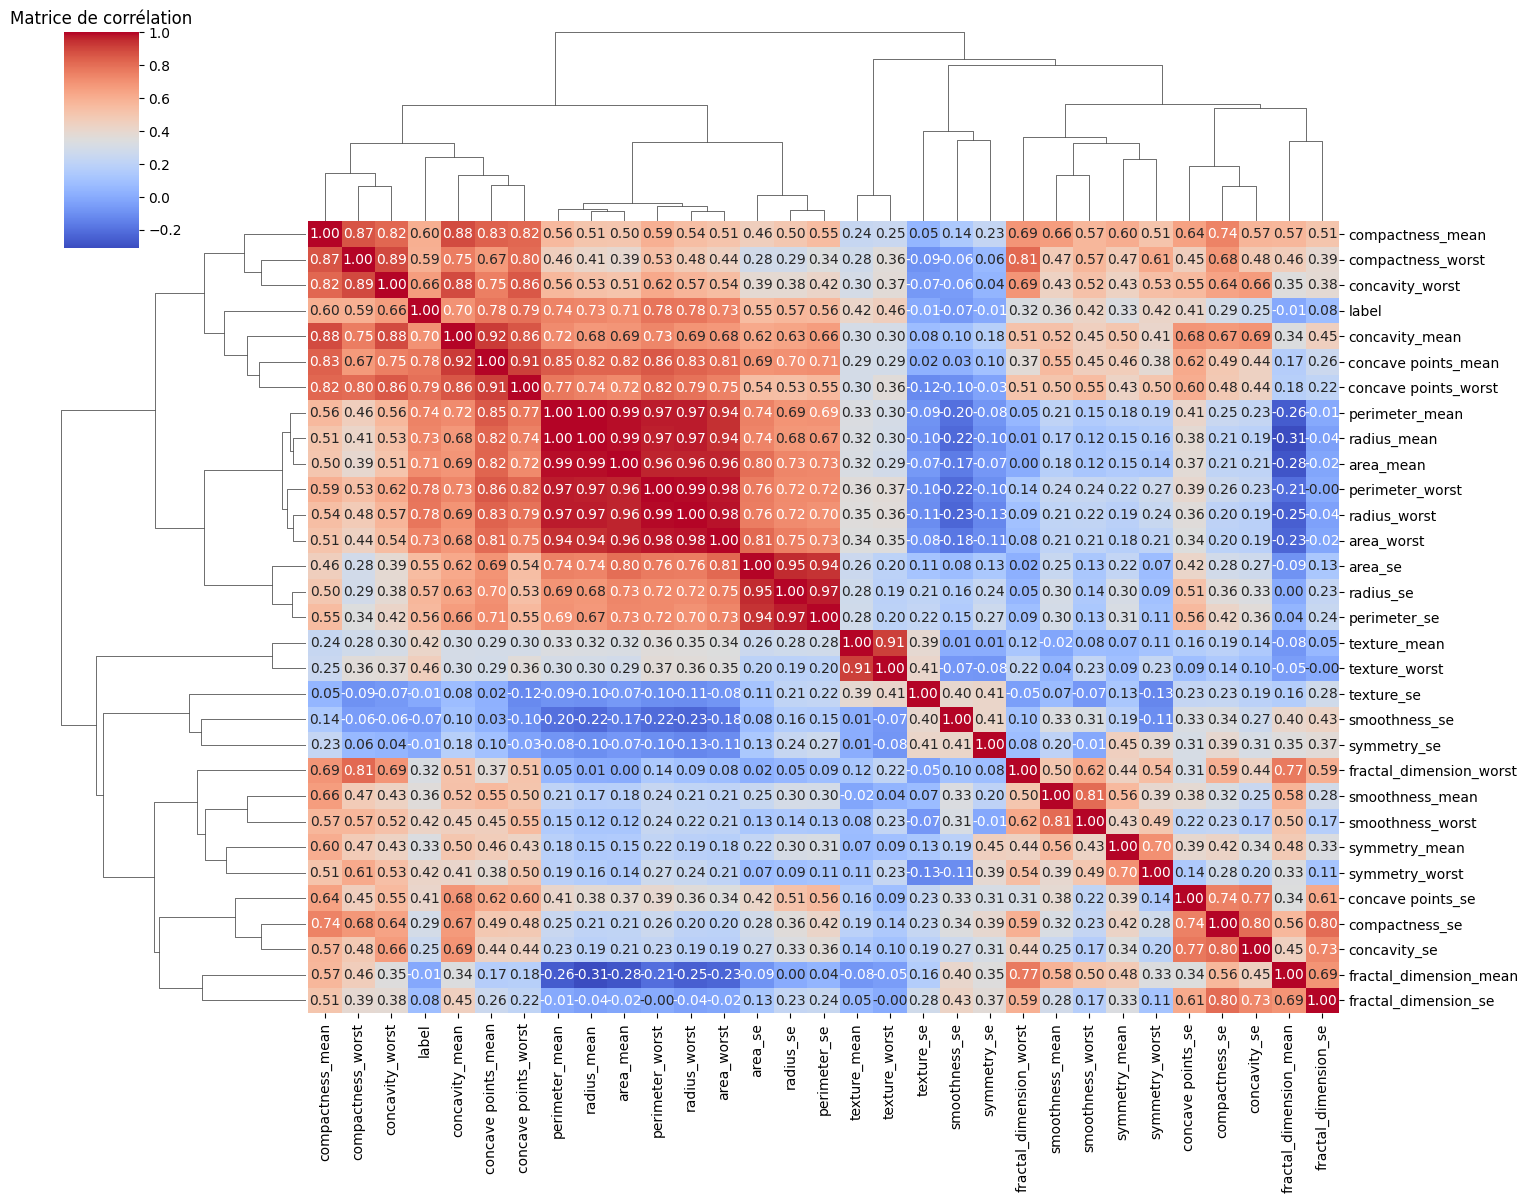

In [ ]:
#Ce code permet de visualiser les relations de corrélation entre nos variables non triées
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
df_encoded = pd.DataFrame(X, columns=df.columns[2:])
df_encoded['label'] = y
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 12))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", figsize=(15, 12))

plt.title("Matrice de corrélation")
plt.show()


<ipython-input-5-88002385c0fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<Figure size 1200x1000 with 0 Axes>

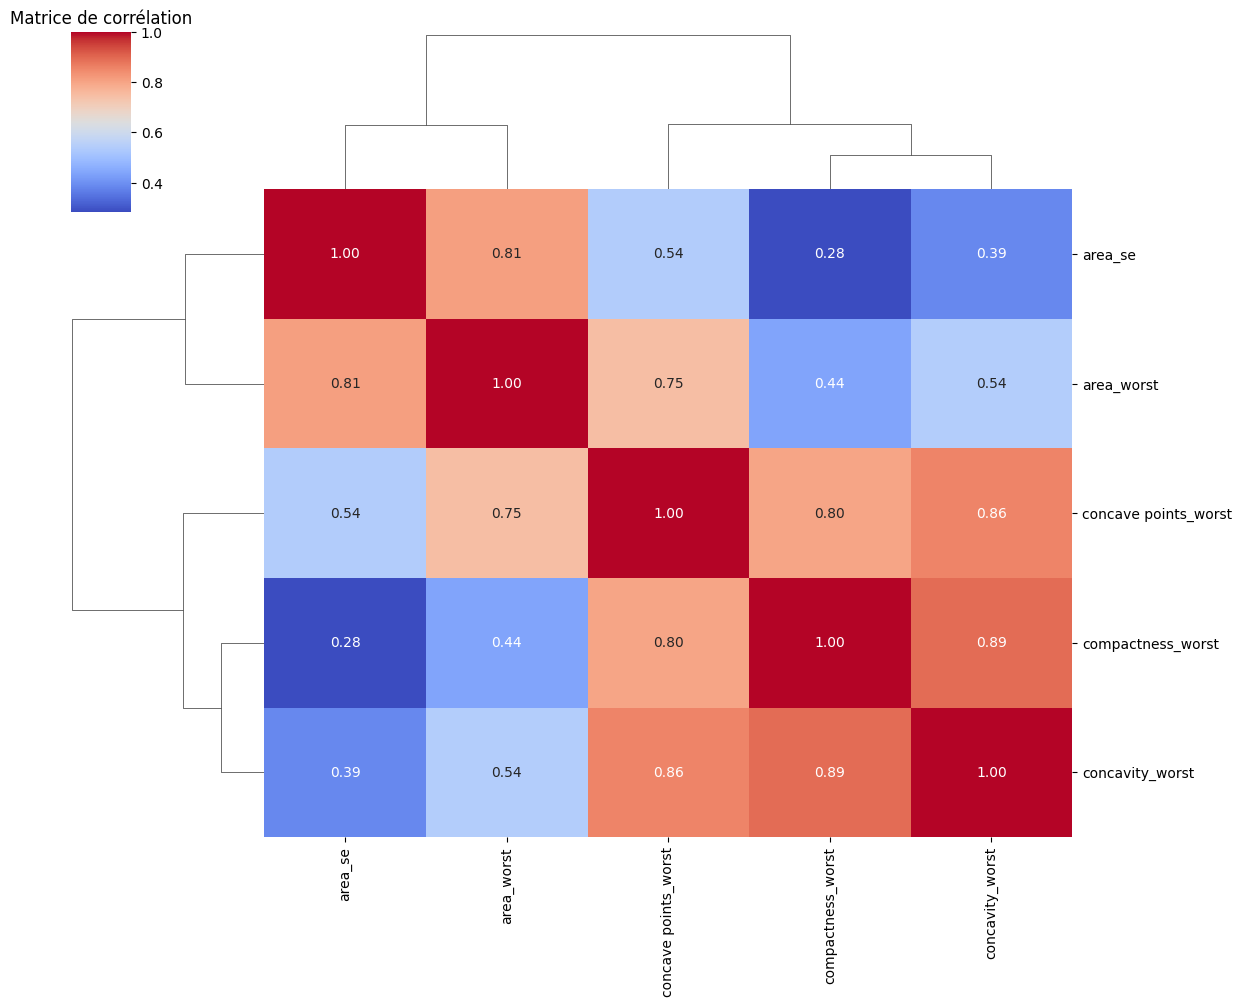

In [ ]:
#visualiser la corrélation des variables triés (exécuter le code tableau trié avant)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", figsize=(12, 10))
plt.title("Matrice de corrélation")
plt.show()

Ici nous avons représenté la nouvelle matrice de corrélation après avoir retiré les variables les moins significatives.

### Définition : facteurs triés, folds et fonction de perte

#### Les Facteurs triés
Ils sont au nombre de 5, la sélection est justifié dans la partie "Statistique descriptive".

#### Les Folds
4 folds permettront d'effectuer une valisation croisée et ainsi analyser au mieux la précision des classifieur sans considérer le sur-apprentissage de la base de donnée. Chaque fold est constitué de 75% de donnée d'entrainement tandis que les 25% restants seront utilisés pour tester le classifieur et ainsi calculer la précision.

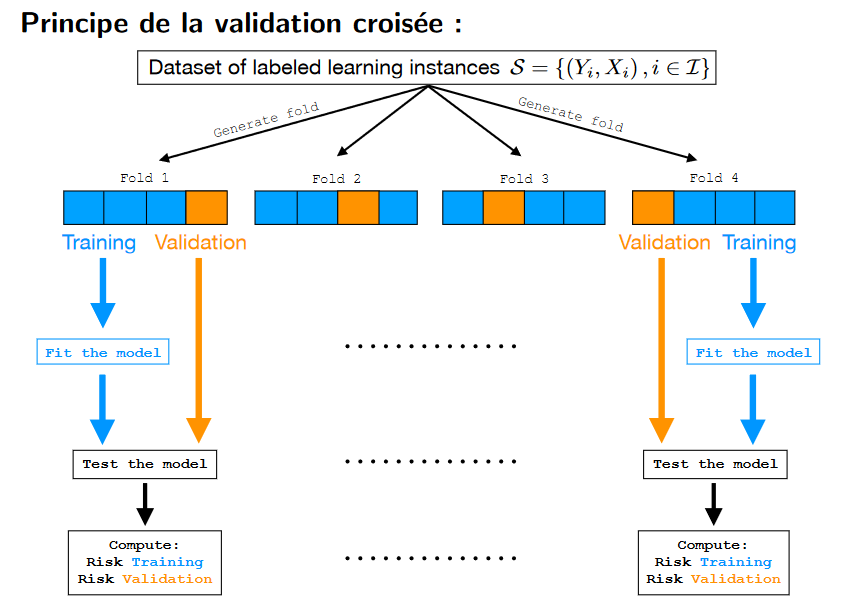

#### La fonction de perte
L'idée derrière la mise en place de cette matrice était de considérer les véritables enjeux autour d'un tel diagnostique. Il est en effet bien plus grave de diagnostiquer une tumeur bégnine alors qu'elle est en réalité maligne et donc dangeurese, que de diagnostiquer le faux positif opposé (qui résulterai seulement à des examens plus approfondis pour vérifier que la tumeur est en effet maligne).
Derrière cette idée nous avons arbitrairement attribue un facteur de gravité 5 aux faux négatifs, un facteur 1 pour les faux positifs et 0 lorsqu'une prédiction est correcte. Ca qui représnete la fonction de perte suivante :

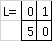



### Classifieurs et performances :    






................................................................

#### - Classifieur de la distance Euclidienne :


In [ ]:
#Ce code donne les résultats du classifieur euclidien sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def euclidean_predict(X_train, y_train, x_test, k=5):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common


y_pred = [euclidean_predict(X_train, y_train, x, k=5) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle euclidien : {:.2f}%".format(accuracy * 100))


Exactitude du modèle euclidien : 95.61%


Précision pour le fold 1: 94.41%
Précision pour le fold 2: 95.77%
Précision pour le fold 3: 92.96%
Précision pour le fold 4: 89.44%


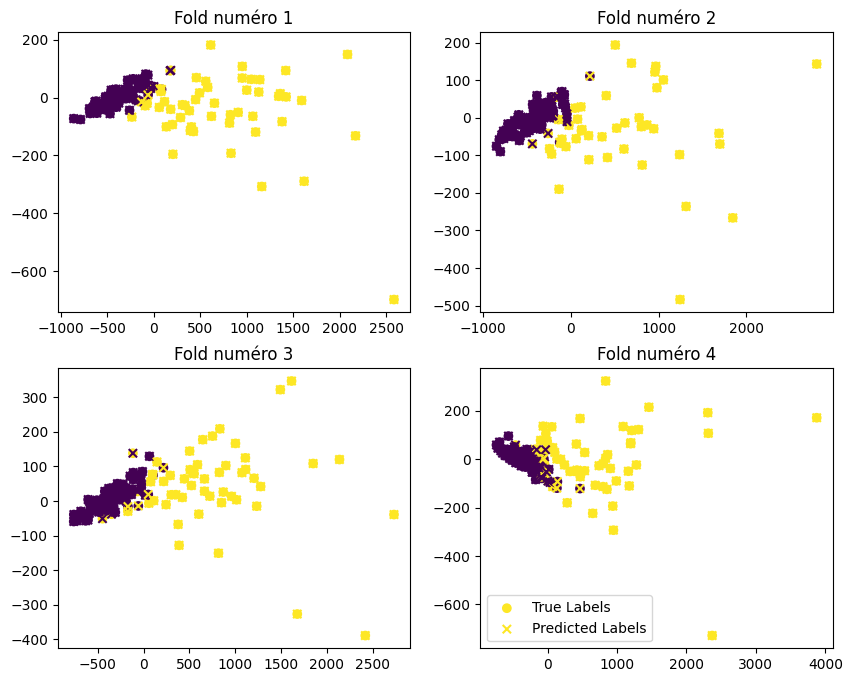

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold du classifieur euclidien sur la base de données générale ou triée selon l'initialisation réalisée
#IMPORTANT : Ce modèle utilise le PCA qui permet l'affichage 2D de plusieurs variables, les graphiques sont donc très approximatifs
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

#C'est une fonction permettant de conserver au maximum les distances entre les points en ayant un affichage 2D
#C'est pas précis mais c'est en guise d'illustration grossière.
pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_pca = pca.fit_transform(X_train)

    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def euclidean_predict(X_train, y_train, x_test, k=5):
        distances = [euclidean_distance(x_test, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    X_test_pca = pca.transform(X_test)

    y_pred = np.array([euclidean_predict(X_train_pca, y_train, x, k=5) for x in X_test_pca])

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision pour le fold {fold + 1}: {accuracy * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='True Labels')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicted Labels')
    axes[fold].set_title(f'Fold numéro {fold + 1}')

axes[-1].legend()

plt.show()


Précision après pénalité pour le fold 1: 93.71%
Précision après pénalité pour le fold 2: 95.07%
Précision après pénalité pour le fold 3: 91.55%
Précision après pénalité pour le fold 4: 88.73%


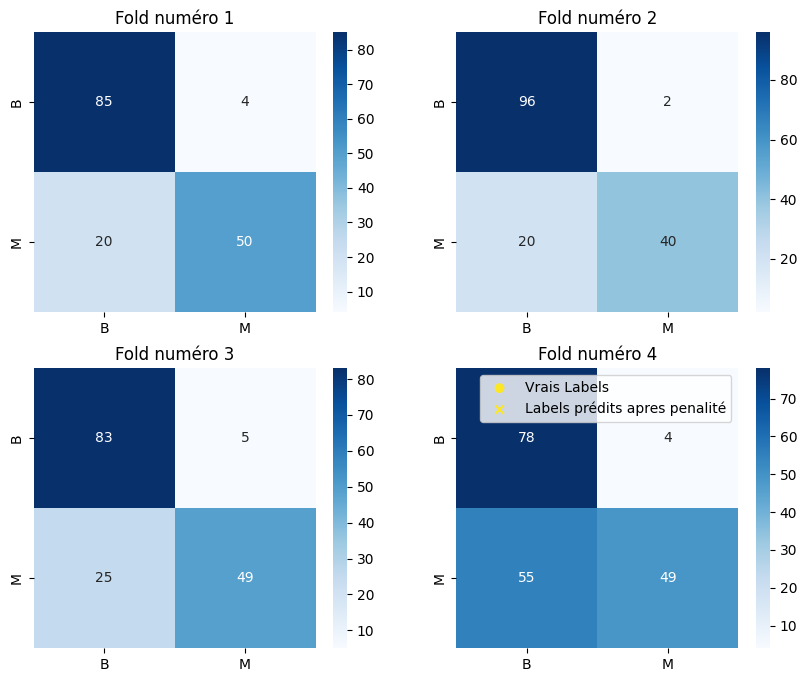

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold du classifieur euclidien punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_pca = pca.fit_transform(X_train)

    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def euclidean_predict(X_train, y_train, x_test, k=5):
        distances = [euclidean_distance(x_test, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    X_test_pca = pca.transform(X_test)

    y_pred = np.array([euclidean_predict(X_train_pca, y_train, x, k=5) for x in X_test_pca])

    #On pénalise les faux positifs
    cm = confusion_matrix(y_test, y_pred)
    cm[1, 0] *= 5  #On aggrave quand ça prédit bénin au lieu de malin

    #On essaye le classifieur KNN avec les pénalités
    knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Vous pouvez ajuster les paramètres selon vos besoins
    knn_classifier.fit(X_train_pca, y_train)
    y_pred_after_penalty = knn_classifier.predict(X_test_pca)

    accuracy_after_penalty = accuracy_score(y_test, y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='Vrais Labels')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_after_penalty, cmap='viridis', marker='x', label='Labels prédits apres penalité')
    axes[fold].set_title(f'Fold numéro {fold + 1}')

    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()




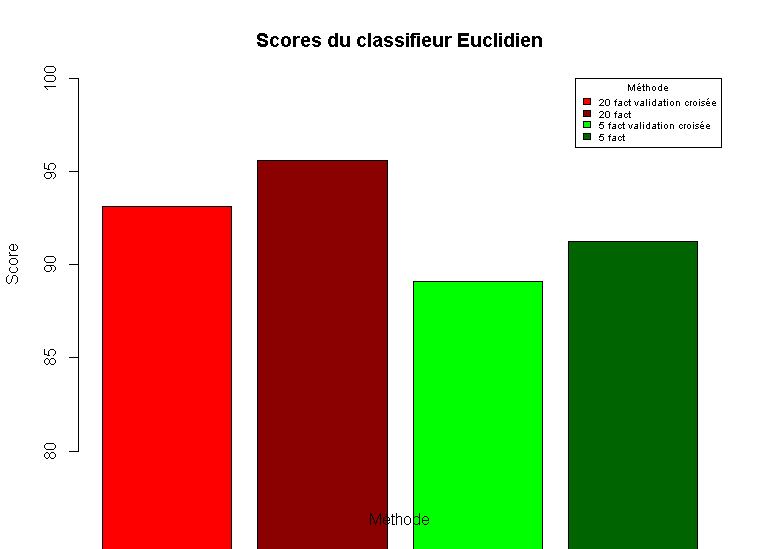

#### - Classifieur des plus proches voisins :


Pour le classifieur des plus proches voisins on veut


In [ ]:
#Ce code donne les résultats du classifieur KNN par rapport à ses 4 folds sur la base de données générale ou triée selon l'initialisation réalisée
kf = KFold(n_splits=4)
KFold(n_splits=4, shuffle=True, random_state=12883823)
kfSplit = kf.split(X)
n=1
for train, test in kfSplit:
    liste = []
    print(f"\nFold numéro {n}\n")
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
    for i in range(30):
        K = KNeighborsClassifier(n_neighbors=i + 1)
        K.fit(X_train, y_train)
        Y_pred = K.predict(X_test)
        acc = accuracy_score(y_test, Y_pred)
        liste.append(acc)
        print(f"Précision de {acc*100}%  pour {i+1} voisins")
    valeur_max = max(liste)
    indice_max = liste.index(valeur_max) + 1
    print(f"Dans ce fold, la précision maximale de {valeur_max*100}% est atteinte pour k={indice_max}.")
    n+=1




Fold numéro 1

Précision de 85.3146853146853%  pour 1 voisins
Précision de 85.3146853146853%  pour 2 voisins
Précision de 86.7132867132867%  pour 3 voisins
Précision de 85.3146853146853%  pour 4 voisins
Précision de 85.3146853146853%  pour 5 voisins
Précision de 84.61538461538461%  pour 6 voisins
Précision de 84.61538461538461%  pour 7 voisins
Précision de 83.21678321678321%  pour 8 voisins
Précision de 84.61538461538461%  pour 9 voisins
Précision de 84.61538461538461%  pour 10 voisins
Précision de 85.3146853146853%  pour 11 voisins
Précision de 83.21678321678321%  pour 12 voisins
Précision de 83.21678321678321%  pour 13 voisins
Précision de 81.81818181818183%  pour 14 voisins
Précision de 81.81818181818183%  pour 15 voisins
Précision de 81.81818181818183%  pour 16 voisins
Précision de 81.81818181818183%  pour 17 voisins
Précision de 80.41958041958041%  pour 18 voisins
Précision de 82.51748251748252%  pour 19 voisins
Précision de 80.41958041958041%  pour 20 voisins
Précision de 80.419

In [ ]:
#Avec le modèle knn, il est possible de calculer la p-value avec scikit, attention exécution très longue
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.9, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
score, permutation_scores, p_value = permutation_test_score(knn_classifier, X_test, Y_test, scoring="accuracy", cv=None, n_permutations=1000, n_jobs=1, random_state=42)

print("Exactitude du modèle KNN à 5 voisis : {:.2f}%".format(score * 100))
print("p-value : {:.5f}".format(p_value))


Exactitude du modèle KNN à 5 voisis : 92.79%
p-value : 0.00100


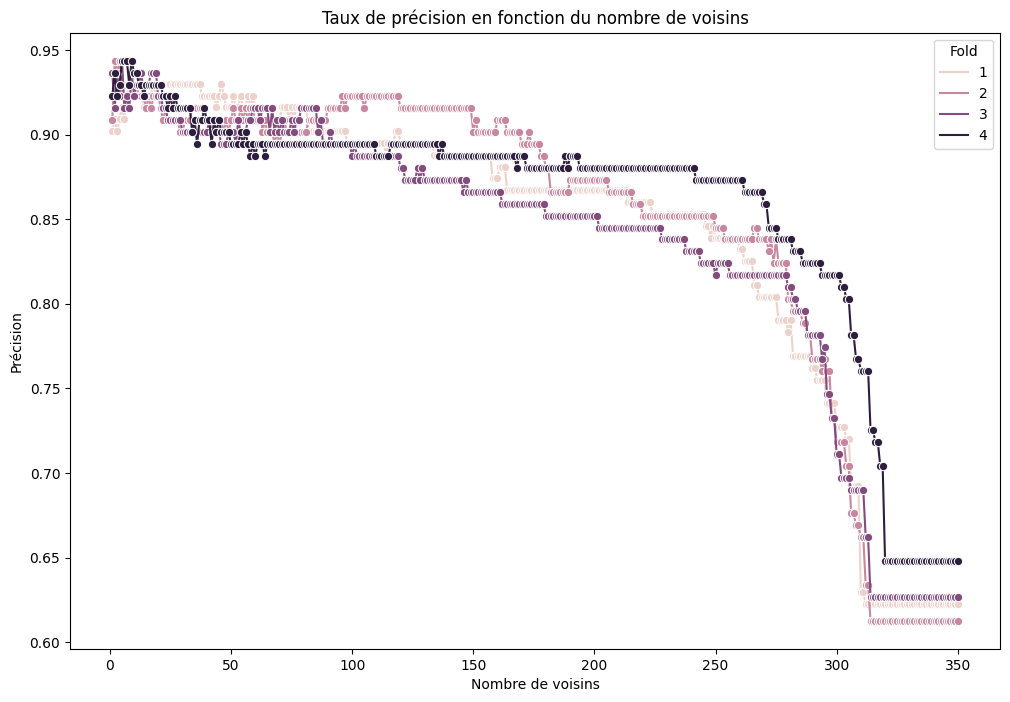

In [ ]:
#Ce code permet d'avoir les graphiques de la précision par rapport au nombre de voisins pour chaque fold
#ATTENTION: Exécution très longue (30sec à 1min) car on va jusqu'à 350 voisins pour voir la stagnation au plus bas
#Vous pouvez modifier le nombre 350 en plus petit si nécessaire
kf = KFold(n_splits=4, shuffle=True, random_state=12883823)
kfSplit = kf.split(X)
n = 1
precision_dict = {'Fold': [], 'Nombre de voisins': [], 'Précision': []}

for train, test in kfSplit:
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]

    for i in range(350):
        k = i + 1
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train, y_train)
        y_pred = knn_clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        precision_dict['Fold'].append(n)
        precision_dict['Nombre de voisins'].append(k)
        precision_dict['Précision'].append(acc)

    n += 1

precision_df = pd.DataFrame(precision_dict)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Nombre de voisins', y='Précision', hue='Fold', data=precision_df, marker='o')
plt.title("Taux de précision en fonction du nombre de voisins")
plt.xlabel("Nombre de voisins")
plt.ylabel("Précision")
plt.legend(title='Fold')
plt.show()


Nous avons ici tracé la courbe ROC pour trouver le nombre de voisins qui maximise la précision avec 4 fold. Ici on observe une diminution de la précision à partir de 50 voisins. Globalement le nombre de voisins optimal se situe autour des 10.


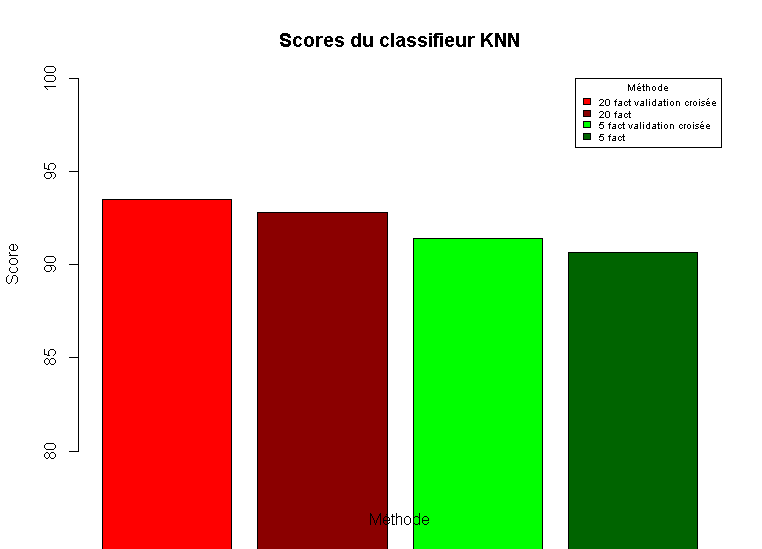

#### - Classifieur Bayes Naïf :



In [ ]:
#Ce code donne les résultats du classifieur BN sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)
Y_pred = naive_bayes_classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du classifieur Naive Bayes : {:.2f}%".format(accuracy * 100))

Précision du classifieur Naive Bayes : 97.37%


Précision pour le fold 1: 93.01%
Précision pour le fold 2: 90.85%
Précision pour le fold 3: 91.55%
Précision pour le fold 4: 84.51%


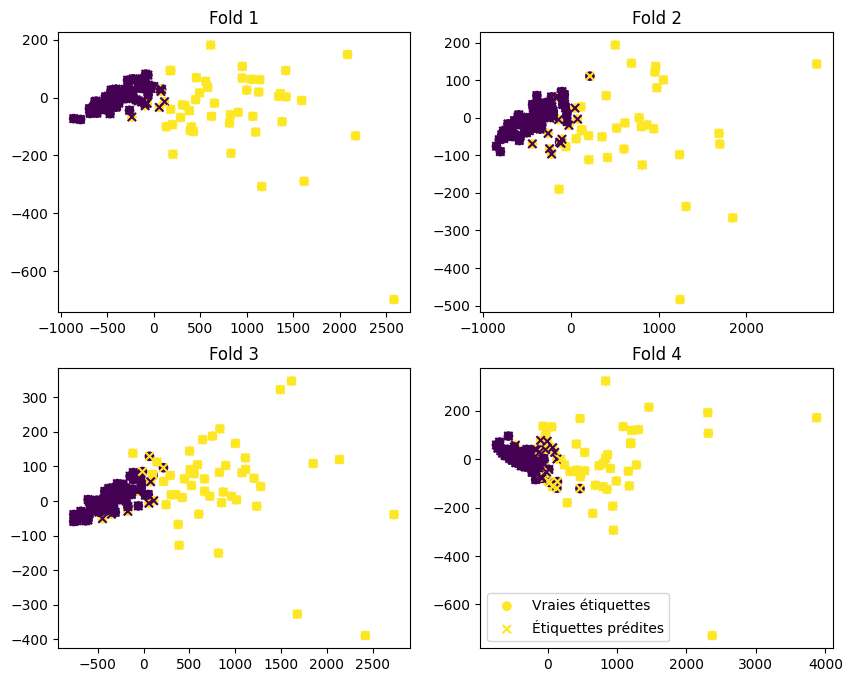

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold du classifieur BN sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = naive_bayes_classifier.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()



Précision après pénalité pour le fold 1: 93.01%
Précision après pénalité pour le fold 2: 90.85%
Précision après pénalité pour le fold 3: 91.55%
Précision après pénalité pour le fold 4: 84.51%


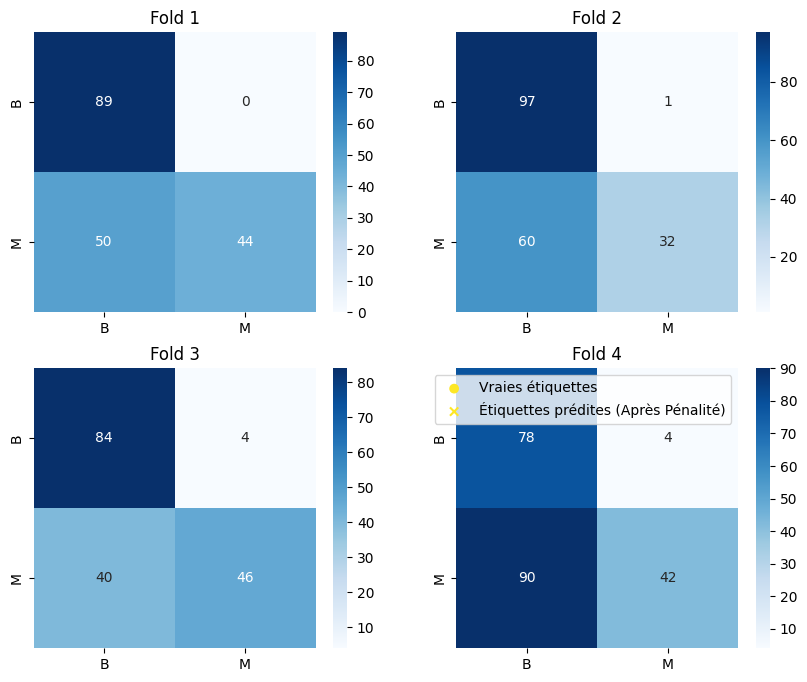

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold du classifieur BN punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = naive_bayes_classifier.predict(X_test_pca)


    cm = metrics.confusion_matrix(Y_test_kfold, Y_pred_kfold)
    cm[1, 0] *= 5

    # Utiliser le classifieur Naive Bayes avec les pénalités ajustées
    naive_bayes_classifier_after_penalty = GaussianNB()
    naive_bayes_classifier_after_penalty.fit(X_train_pca, Y_train_kfold)
    Y_pred_after_penalty = naive_bayes_classifier_after_penalty.predict(X_test_pca)

    accuracy_after_penalty = metrics.accuracy_score(Y_test_kfold, Y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_after_penalty, cmap='viridis', marker='x', label='Étiquettes prédites (Après Pénalité)')

    axes[fold].set_title(f'Fold {fold + 1}')

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()

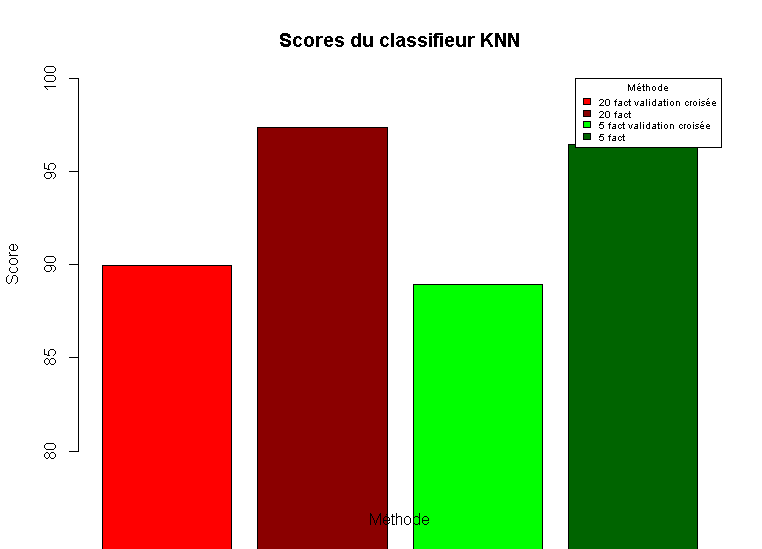

#### - Classifieur LDA :


In [ ]:
#Ce code donne les résultats du classifieur LDA sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, Y_train)
Y_pred = lda_classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du classifieur LDA : {:.2f}%".format(accuracy * 100))

Précision du classifieur LDA : 95.61%


Précision pour le fold 1: 90.21%
Précision pour le fold 2: 86.62%
Précision pour le fold 3: 90.85%
Précision pour le fold 4: 80.99%


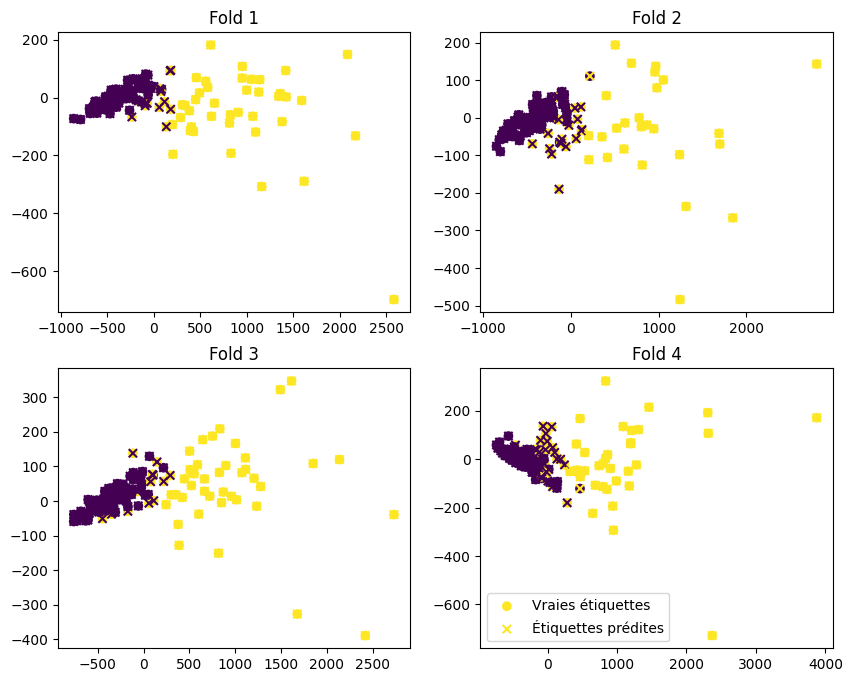

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold du classifieur LDA sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    lda_classifier = LinearDiscriminantAnalysis()
    lda_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = lda_classifier.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')
    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()


Précision après pénalité pour le fold 1: 90.21%
Précision après pénalité pour le fold 2: 86.62%
Précision après pénalité pour le fold 3: 90.85%
Précision après pénalité pour le fold 4: 80.99%


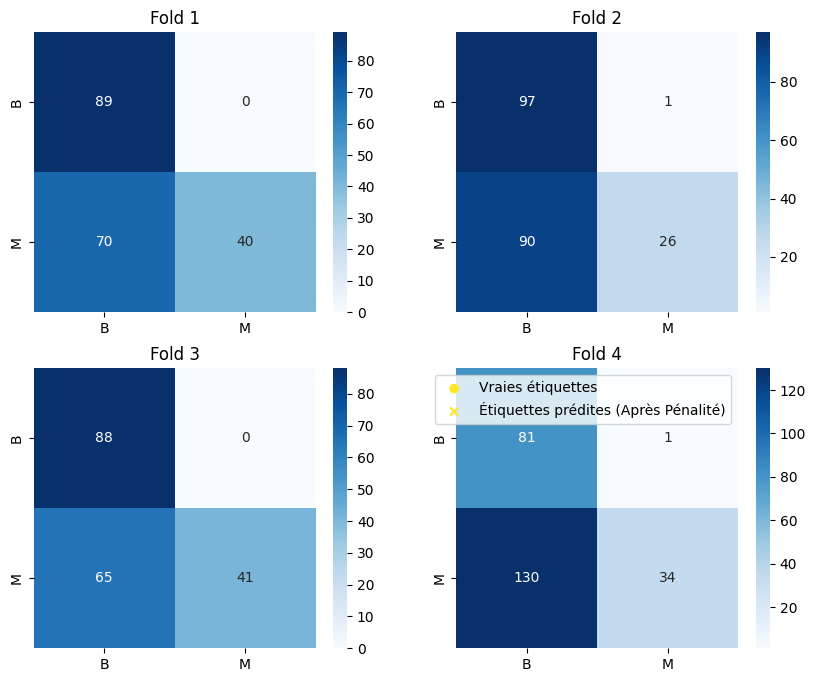

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold du classifieur LDA punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    lda_classifier = LinearDiscriminantAnalysis()
    lda_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = lda_classifier.predict(X_test_pca)

    cm = metrics.confusion_matrix(Y_test_kfold, Y_pred_kfold)
    cm[1, 0] *= 5

    lda_classifier_after_penalty = LinearDiscriminantAnalysis()
    lda_classifier_after_penalty.fit(X_train_pca, Y_train_kfold)
    Y_pred_after_penalty = lda_classifier_after_penalty.predict(X_test_pca)

    accuracy_after_penalty = metrics.accuracy_score(Y_test_kfold, Y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_after_penalty, cmap='viridis', marker='x', label='Étiquettes prédites (Après Pénalité)')
    axes[fold].set_title(f'Fold {fold + 1}')

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()


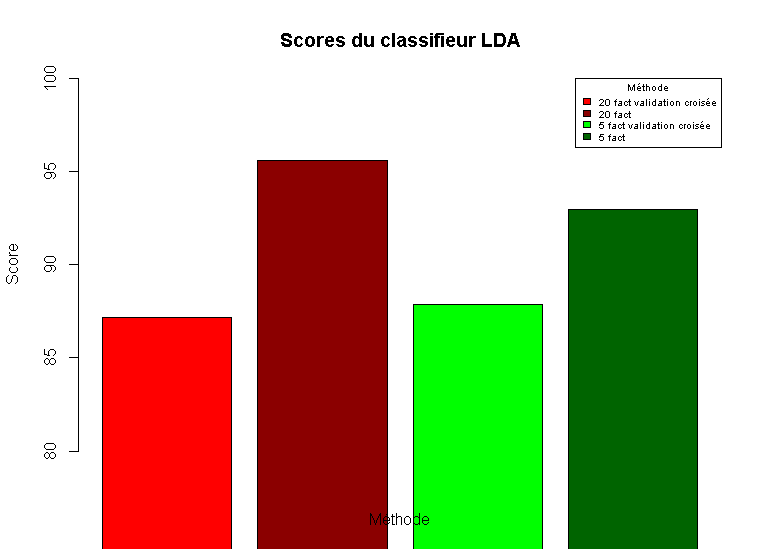

#### - Classifieur QDA :



In [ ]:
#Ce code donne les résultats du classifieur QDA sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, Y_train)
Y_pred = qda_classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du classifieur QDA : {:.2f}%".format(accuracy * 100))

Précision du classifieur QDA : 95.61%


Précision pour le fold 1: 95.80%
Précision pour le fold 2: 94.37%
Précision pour le fold 3: 92.96%
Précision pour le fold 4: 91.55%


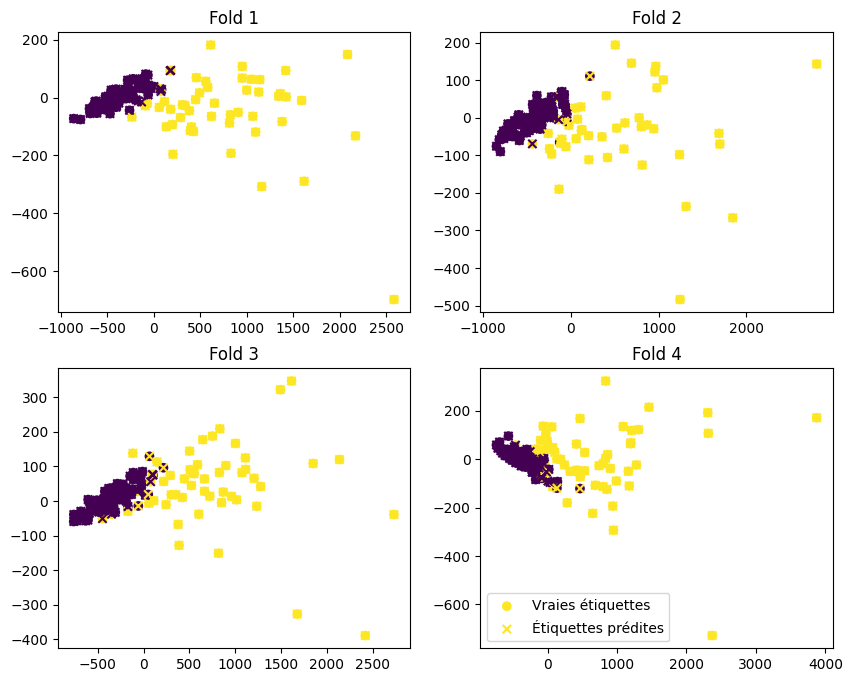

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold du classifieur QDA sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
kf = KFold(n_splits=4, shuffle=True, random_state=42)
pca = PCA(n_components=2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    qda_classifier = QuadraticDiscriminantAnalysis()
    qda_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = qda_classifier.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()


Précision après pénalité pour le fold 1: 95.80%
Précision après pénalité pour le fold 2: 94.37%
Précision après pénalité pour le fold 3: 92.96%
Précision après pénalité pour le fold 4: 91.55%


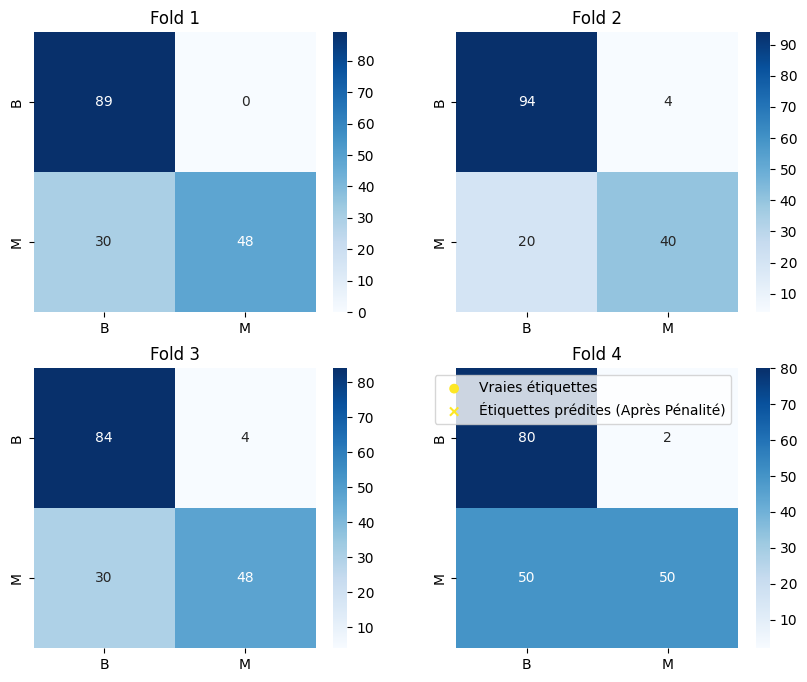

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold du classifieur QDA punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
kf = KFold(n_splits=4, shuffle=True, random_state=42)
pca = PCA(n_components=2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    qda_classifier = QuadraticDiscriminantAnalysis()
    qda_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = qda_classifier.predict(X_test_pca)

    cm = metrics.confusion_matrix(Y_test_kfold, Y_pred_kfold)
    cm[1, 0] *= 5

    qda_classifier_after_penalty = QuadraticDiscriminantAnalysis()
    qda_classifier_after_penalty.fit(X_train_pca, Y_train_kfold)
    Y_pred_after_penalty = qda_classifier_after_penalty.predict(X_test_pca)

    accuracy_after_penalty = metrics.accuracy_score(Y_test_kfold, Y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_after_penalty, cmap='viridis', marker='x', label='Étiquettes prédites (Après Pénalité)')
    axes[fold].set_title(f'Fold {fold + 1}')
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()


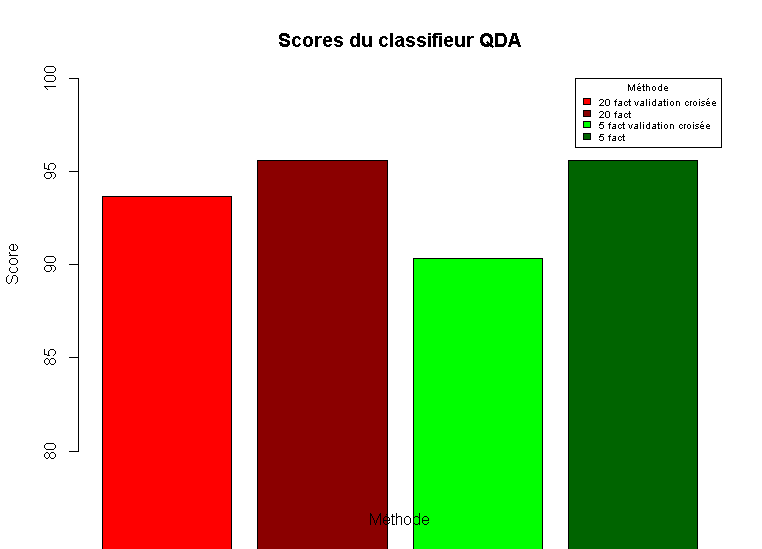

#### - Classifieur Perceptron :

In [ ]:
#Ce code donne les résultats du classifieur Perceptron sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
perceptron_classifier = Perceptron(max_iter=1000, random_state=42)
perceptron_classifier.fit(X_train, Y_train)
Y_pred = perceptron_classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du classifieur Perceptron : {:.2f}%".format(accuracy * 100))

Précision du classifieur Perceptron : 97.37%


Précision pour le fold 1: 95.10%
Précision pour le fold 2: 90.85%
Précision pour le fold 3: 92.25%
Précision pour le fold 4: 87.32%


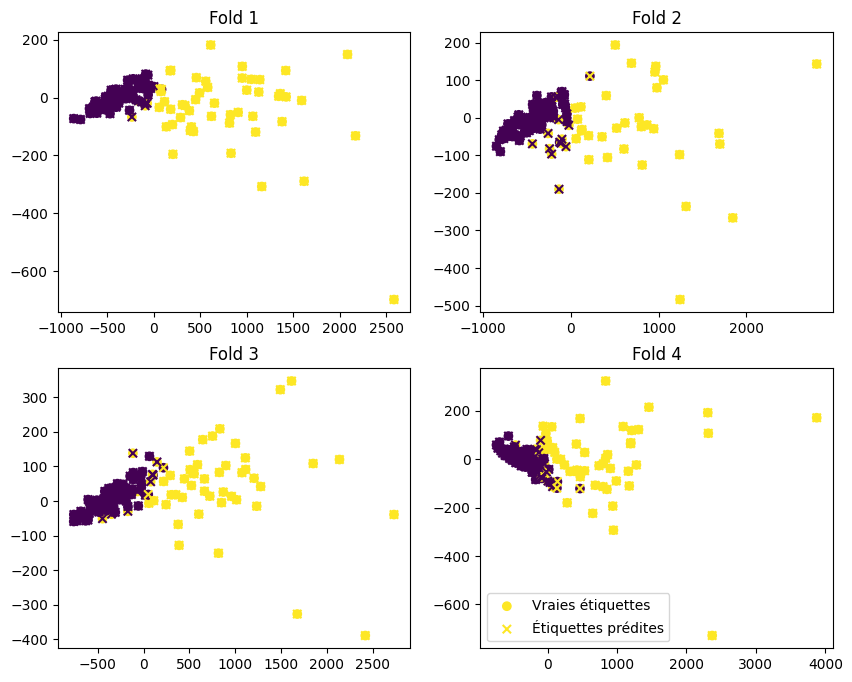

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold du classifieur Perceptron sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    perceptron_classifier = Perceptron(max_iter=1000, random_state=42)
    perceptron_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = perceptron_classifier.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()


Précision après pénalité pour le fold 1: 95.10%
Précision après pénalité pour le fold 2: 90.85%
Précision après pénalité pour le fold 3: 92.25%
Précision après pénalité pour le fold 4: 87.32%


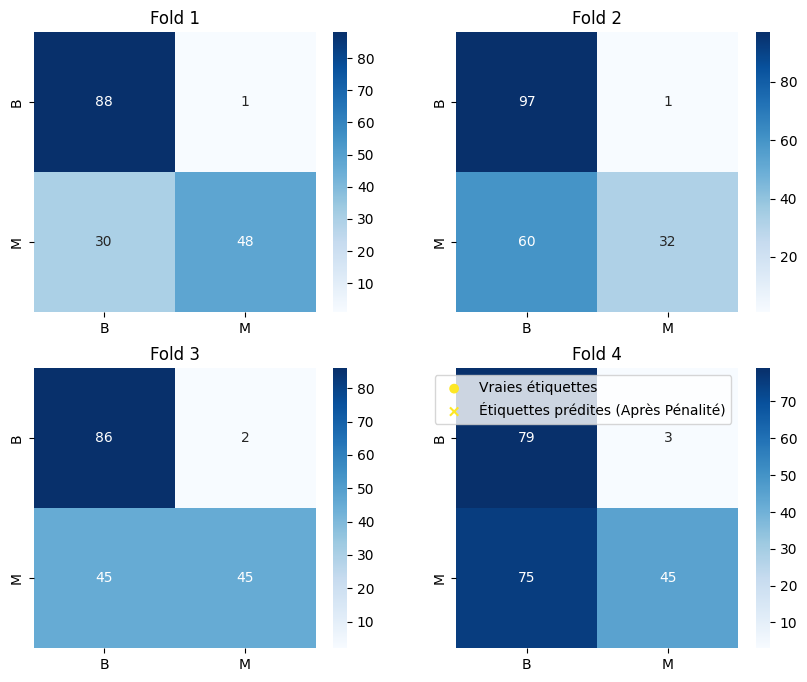

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold du classifieur Perceptron punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    perceptron_classifier = Perceptron(max_iter=1000, random_state=42)
    perceptron_classifier.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = perceptron_classifier.predict(X_test_pca)

    cm = metrics.confusion_matrix(Y_test_kfold, Y_pred_kfold)
    cm[1, 0] *= 5

    perceptron_classifier_after_penalty = Perceptron(max_iter=1000, random_state=42)
    perceptron_classifier_after_penalty.fit(X_train_pca, Y_train_kfold)
    Y_pred_after_penalty = perceptron_classifier_after_penalty.predict(X_test_pca)

    accuracy_after_penalty = metrics.accuracy_score(Y_test_kfold, Y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_after_penalty, cmap='viridis', marker='x', label='Étiquettes prédites (Après Pénalité)')
    axes[fold].set_title(f'Fold {fold + 1}')

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()


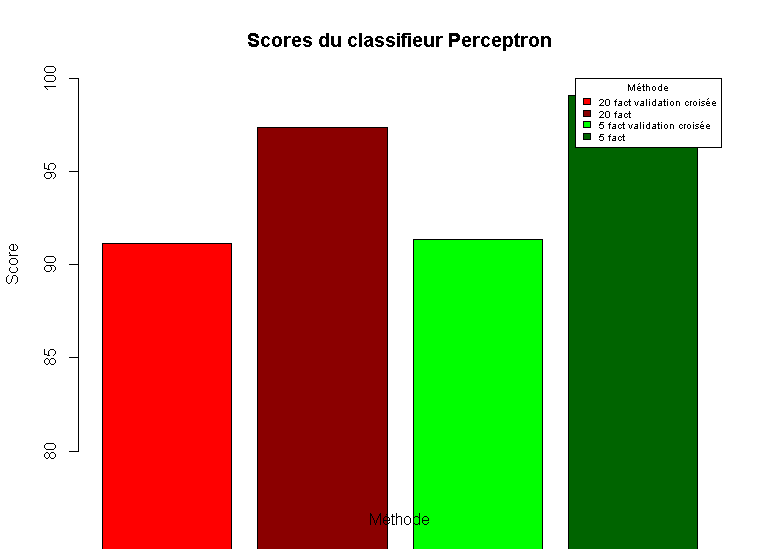

## Regression logistique


Précision du modèle de régression logistique : 97.37%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

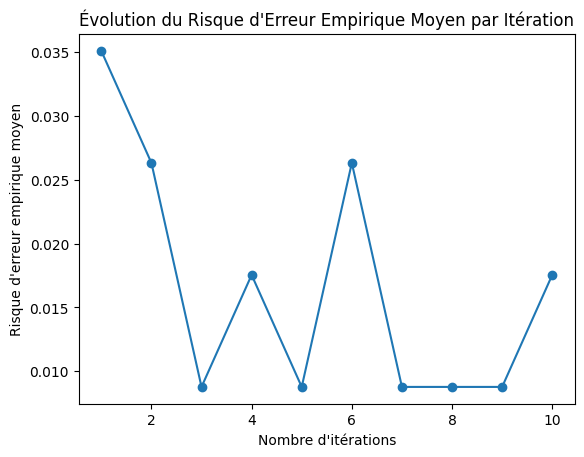

In [ ]:
#Le nombre d'itérations crée un message d'erreur dû au nombre de donnée, c'est à ignorer, seul le graphique est pertinent
#Ce code donne les résultats et le graphique de risque de la régression logistique sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du modèle de régression logistique : {:.2f}%".format(accuracy * 100))
n_iterations = 10
empirical_risks = []

for i in range(1, n_iterations + 1):
    logistic_regression_model.max_iter = i
    logistic_regression_model.fit(X_train, Y_train)
    Y_pred_iter = logistic_regression_model.predict(X_test)
    empirical_risk = 1 - metrics.accuracy_score(Y_test, Y_pred_iter)
    empirical_risks.append(empirical_risk)
#c'est le graph du risque d'erreur selon le nombre d'itérations
plt.plot(np.arange(1, n_iterations + 1), empirical_risks, marker='o')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Risque d\'erreur empirique moyen')
plt.title('Évolution du Risque d\'Erreur Empirique Moyen par Itération')
plt.show()

Précision pour le fold 1: 97.90%
Précision pour le fold 2: 92.96%
Précision pour le fold 3: 90.85%
Précision pour le fold 4: 89.44%


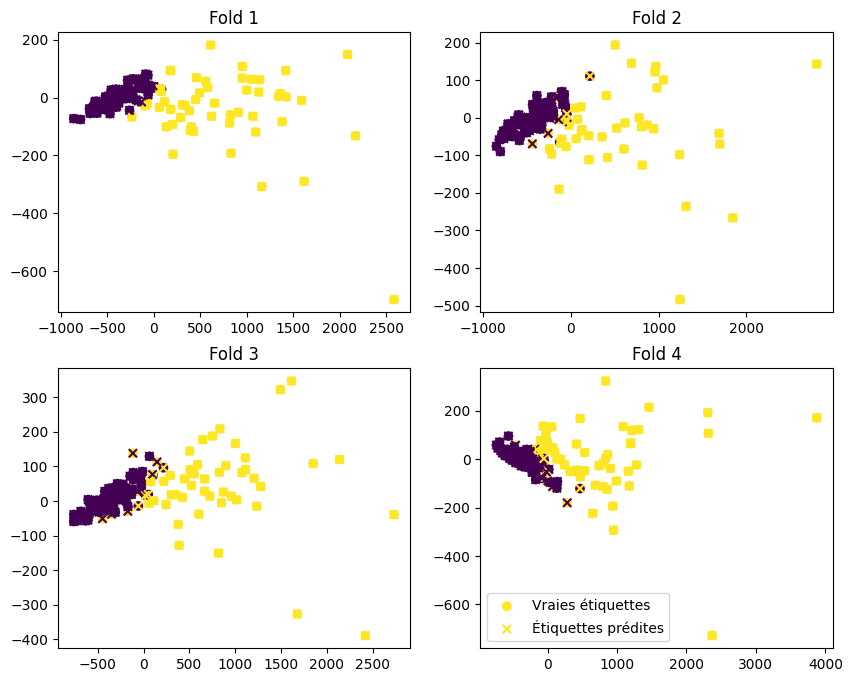

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold de la regression logistique sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    logistic_regression_model = LogisticRegression(random_state=42)
    logistic_regression_model.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = logistic_regression_model.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()


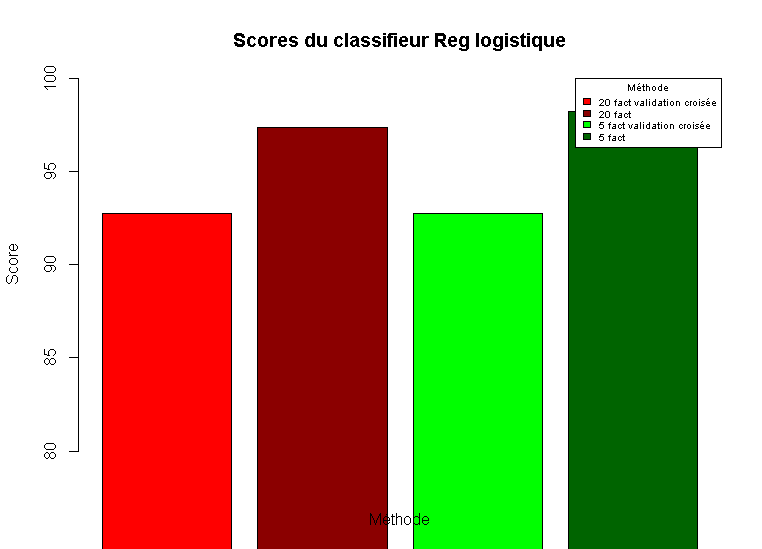

Arbre de décision


Précision du modèle d'arbre de décision : 94.74%


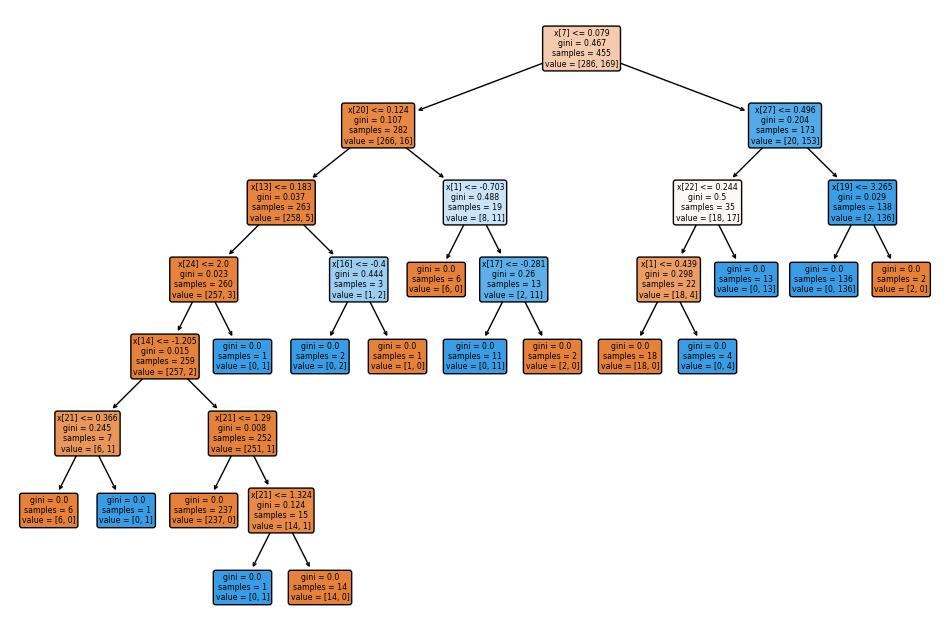

In [ ]:
#Ce code donne les résultats de l'arbre de décision sur la base de données générale ou triée selon l'initialisation réalisée
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, Y_train)
Y_pred = decision_tree_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Précision du modèle d'arbre de décision : {:.2f}%".format(accuracy * 100))
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()


Précision pour le fold 1: 92.31%
Précision pour le fold 2: 92.25%
Précision pour le fold 3: 90.14%
Précision pour le fold 4: 90.14%


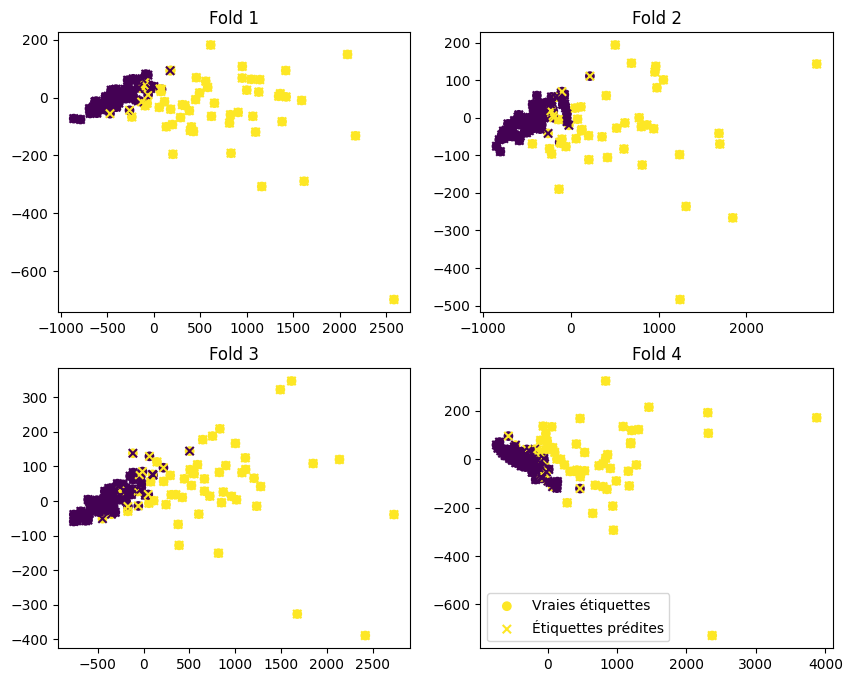

In [ ]:
#Ce code donne les graphiques et le taux de réussite par fold de l'arbre de décision sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    Decision_tree_model = DecisionTreeClassifier(random_state=42)
    Decision_tree_model.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = Decision_tree_model.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()

Précision après pénalité pour le fold 1: 92.31%
Précision après pénalité pour le fold 2: 92.25%
Précision après pénalité pour le fold 3: 90.14%
Précision après pénalité pour le fold 4: 90.14%


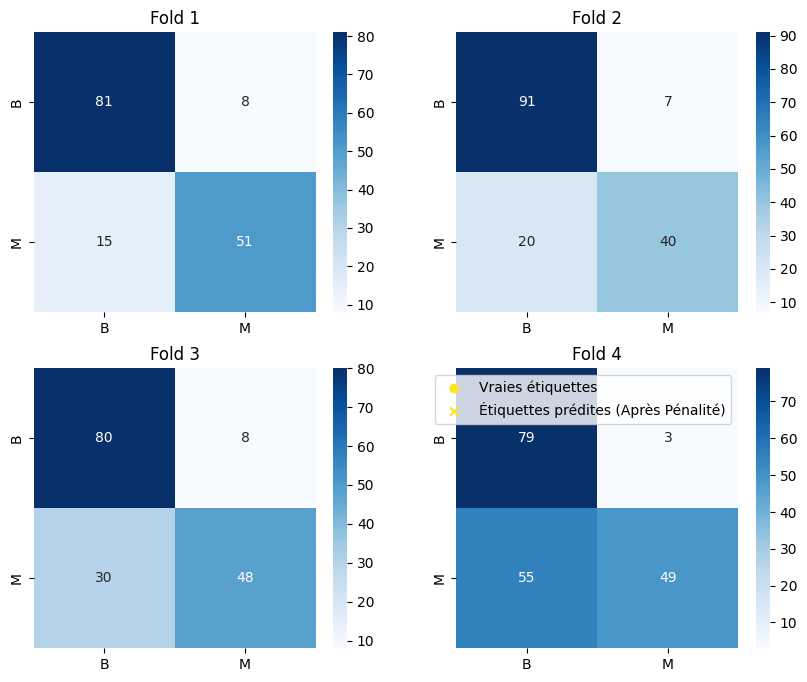

In [ ]:
#Ce code donne les matrices de résultats et le taux de réussite par fold de l'arbre de décision punis par une fonction de perte sur la base de données générale ou triée selon l'initialisation réalisée
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    Decision_tree_model = DecisionTreeClassifier(random_state=42)
    Decision_tree_model.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = Decision_tree_model.predict(X_test_pca)

    cm = metrics.confusion_matrix(Y_test_kfold, Y_pred_kfold)
    cm[1, 0] *= 5

    Decision_tree_model_after_penalty = DecisionTreeClassifier(random_state=42)
    Decision_tree_model_after_penalty.fit(X_train_pca, Y_train_kfold)
    Y_pred_after_penalty = Decision_tree_model_after_penalty.predict(X_test_pca)

    accuracy_after_penalty = metrics.accuracy_score(Y_test_kfold, Y_pred_after_penalty)
    print(f"Précision après pénalité pour le fold {fold + 1}: {accuracy_after_penalty * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_after_penalty, cmap='viridis', marker='x', label='Étiquettes prédites (Après Pénalité)')
    axes[fold].set_title(f'Fold {fold + 1}')

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[fold], xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

axes[-1].legend()
plt.show()


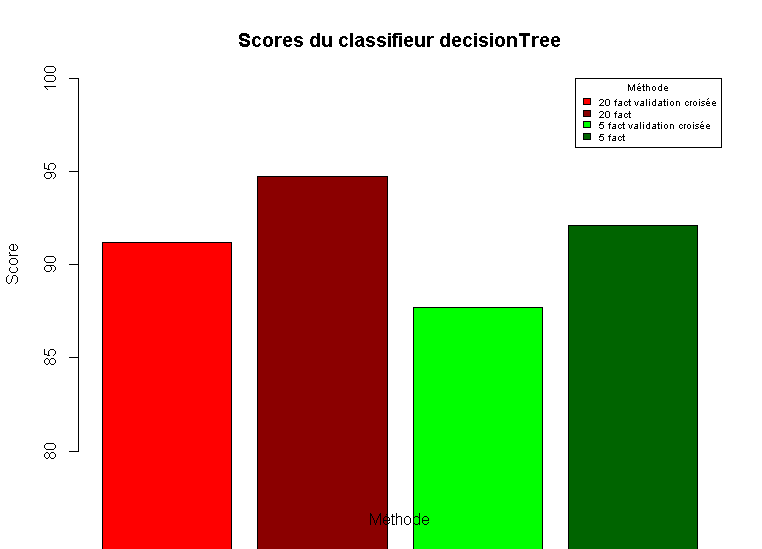

Arbre élagué

Arbre numéro 1
Précision du modèle d'arbre de décision: 89.47%


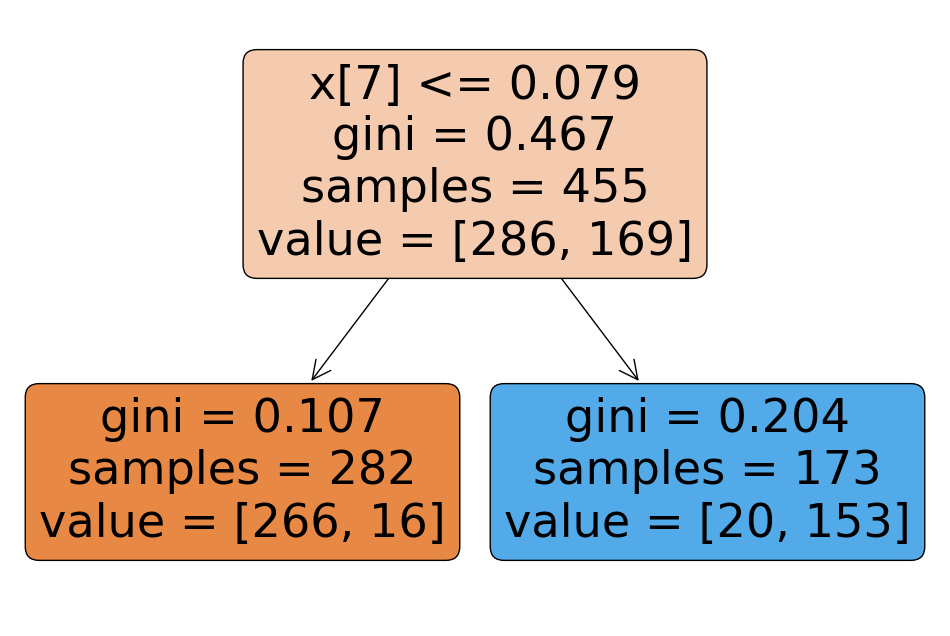

Arbre numéro 2
Précision du modèle d'arbre de décision: 92.98%


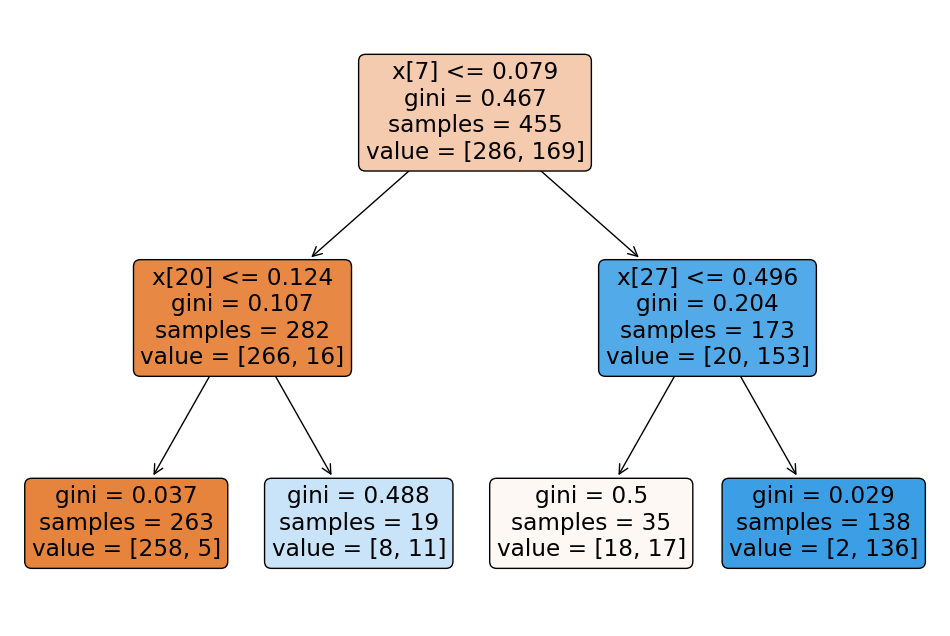

Arbre numéro 3
Précision du modèle d'arbre de décision: 94.74%


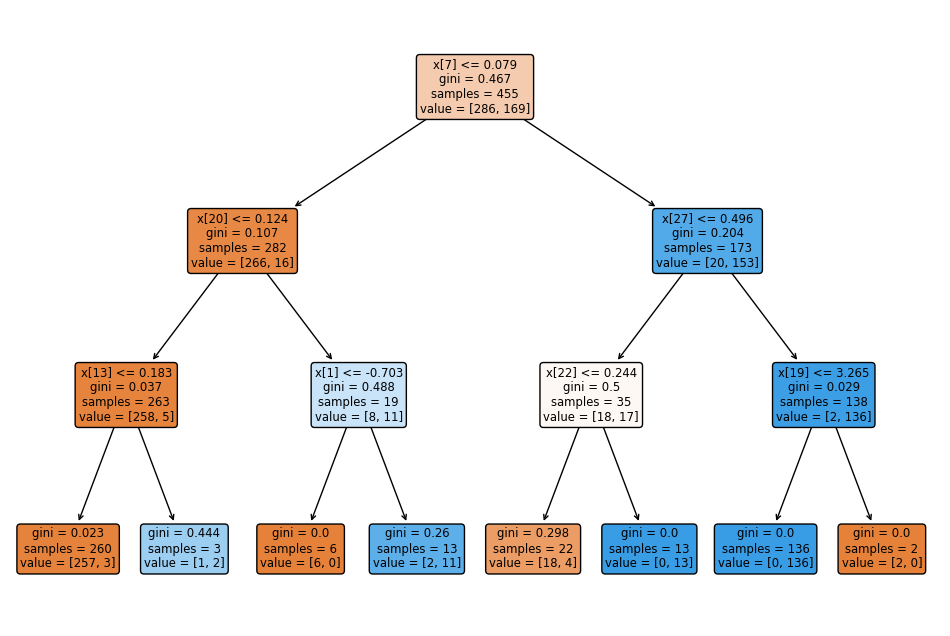

Arbre numéro 4
Précision du modèle d'arbre de décision: 94.74%


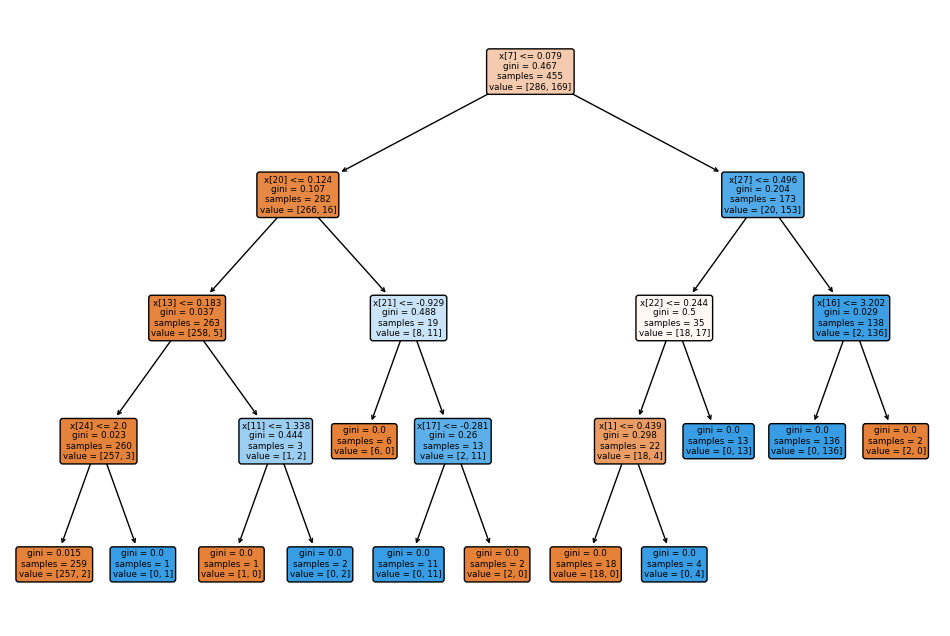

Arbre numéro 5
Précision du modèle d'arbre de décision: 94.74%


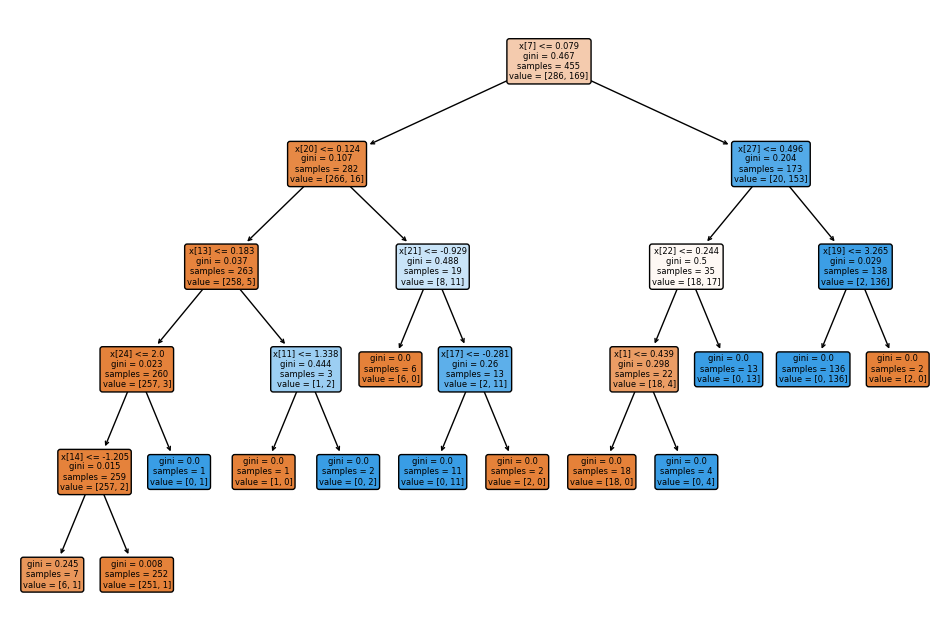

In [ ]:
#Ce code donne un arbre élagué selon 6 niveaux
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
for i in range(1,6):
  decision_tree_model = DecisionTreeClassifier(max_depth=i, random_state=42)
  decision_tree_model.fit(X_train, Y_train)
  Y_pred = decision_tree_model.predict(X_test)
  accuracy = metrics.accuracy_score(Y_test, Y_pred)
  print(f"Arbre numéro {i}")
  print("Précision du modèle d'arbre de décision: {:.2f}%".format(accuracy * 100))
  plt.figure(figsize=(12, 8))
  plot_tree(decision_tree_model, filled=True, feature_names=None, class_names=None, rounded=True)
  plt.show()


Précision pour le fold 1: 94.41%
Précision pour le fold 2: 93.66%
Précision pour le fold 3: 92.25%
Précision pour le fold 4: 87.32%


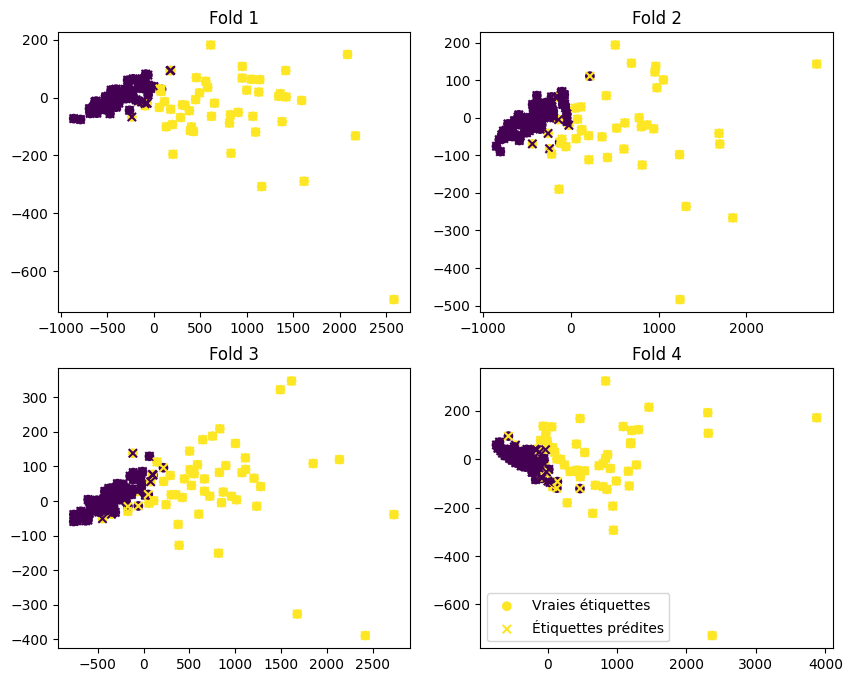

In [ ]:
#Pareil mais avec le PCA
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

pca = PCA(n_components=2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    Y_train_kfold, Y_test_kfold = Y_encoded[train_index], Y_encoded[test_index]

    X_train_pca = pca.fit_transform(X_train_kfold)

    Decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    Decision_tree_model.fit(X_train_pca, Y_train_kfold)

    X_test_pca = pca.transform(X_test_kfold)
    Y_pred_kfold = Decision_tree_model.predict(X_test_pca)

    accuracy_kfold = metrics.accuracy_score(Y_test_kfold, Y_pred_kfold)
    print(f"Précision pour le fold {fold + 1}: {accuracy_kfold * 100:.2f}%")

    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test_kfold, cmap='viridis', label='Vraies étiquettes')
    axes[fold].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_kfold, cmap='viridis', marker='x', label='Étiquettes prédites')

    axes[fold].set_title(f'Fold {fold + 1}')

axes[-1].legend()

plt.show()

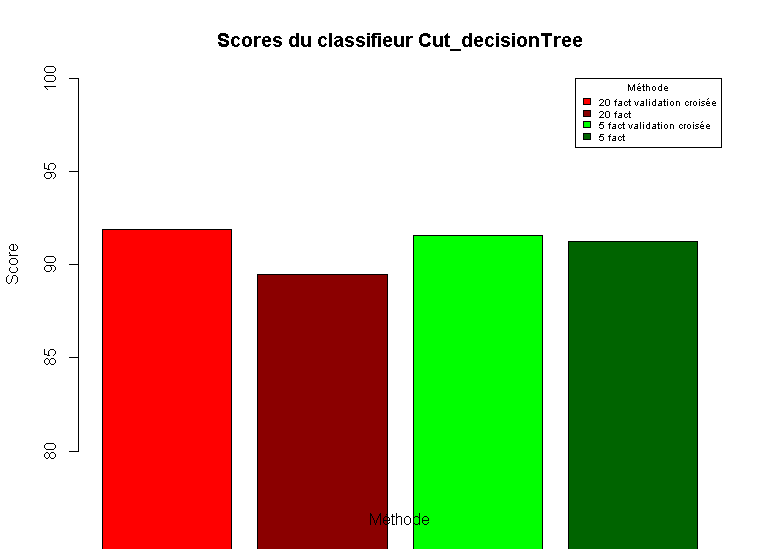

# Courbe ROC


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


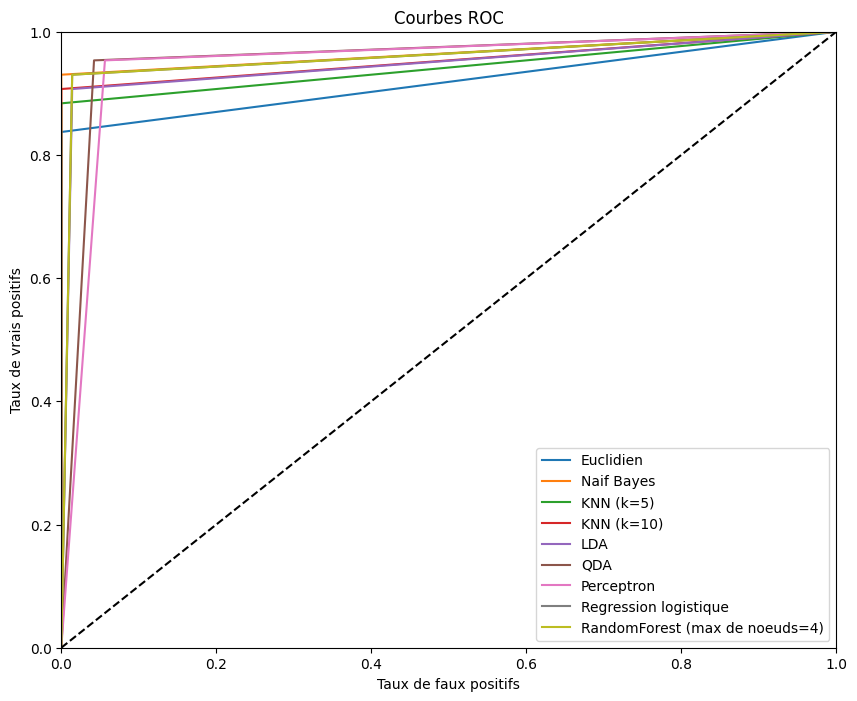

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

euclidean_clf = NearestCentroid()
euclidean_clf.fit(X_train, y_train)
fpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, euclidean_clf.predict(X_test))

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_clf.predict(X_test))

knn5_clf = KNeighborsClassifier(n_neighbors=5)
knn5_clf.fit(X_train, y_train)
fpr_knn5, tpr_knn5, _ = roc_curve(y_test, knn5_clf.predict(X_test))
knn10_clf = KNeighborsClassifier(n_neighbors=10)
knn10_clf.fit(X_train, y_train)
fpr_knn10, tpr_knn10, _ = roc_curve(y_test, knn10_clf.predict(X_test))

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_clf.predict(X_test))

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)
fpr_qda, tpr_qda, _ = roc_curve(y_test, qda_clf.predict(X_test))

perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)
fpr_perceptron, tpr_perceptron, _ = roc_curve(y_test, perceptron_clf.predict(X_test))

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_clf.predict(X_test))

rf_clf = RandomForestClassifier(max_depth=4, random_state=42)
rf_clf.fit(X_train, y_train)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict(X_test))

plt.figure(figsize=(10, 8))
plt.plot(fpr_euclidean, tpr_euclidean, label='Euclidien')
plt.plot(fpr_gnb, tpr_gnb, label='Naif Bayes')
plt.plot(fpr_knn5, tpr_knn5, label='KNN (k=5)')
plt.plot(fpr_knn10, tpr_knn10, label='KNN (k=10)')
plt.plot(fpr_lda, tpr_lda, label='LDA')
plt.plot(fpr_qda, tpr_qda, label='QDA')
plt.plot(fpr_perceptron, tpr_perceptron, label='Perceptron')
plt.plot(fpr_logreg, tpr_logreg, label='Regression logistique')
plt.plot(fpr_rf, tpr_rf, label='RandomForest (max de noeuds=4)')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc='lower right')
plt.show()


### Choix définitif du classifieur :     

Nous allons considérer 3 cas de figures pour sélectionner le classifieur le plus performant : Une première partie où le trie des facteurs est considéré (ce qui est généralement nécessaire pour réduire la quantité de mesures à effectuer et ainsi optimiser les coûts), une deuxième partie ou tous les facteurs sont considérés, et une troisième partie où cette-fois-ci la fonction de perte sera prise en compte dans le choix du classifieur optimal.

Ci dessous les graphiques des scores de précision de chaque classifieur, selon si seulement 5 facteurs, ou tous les facteurs (20) sont considérés :

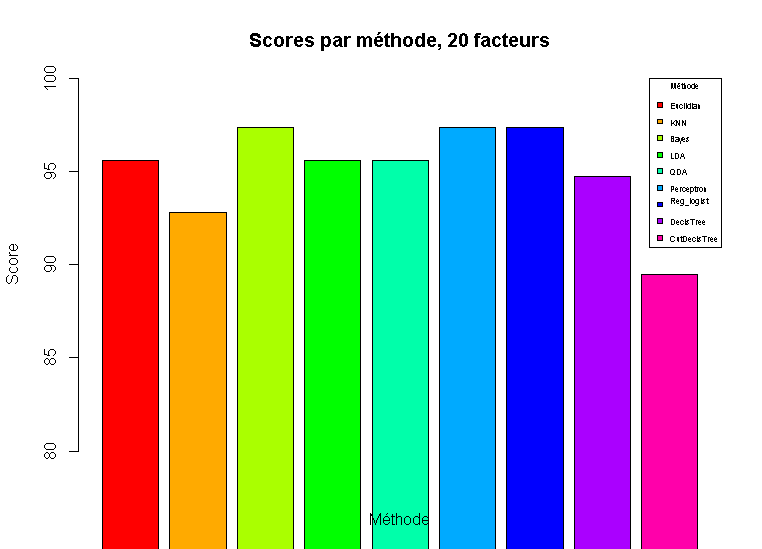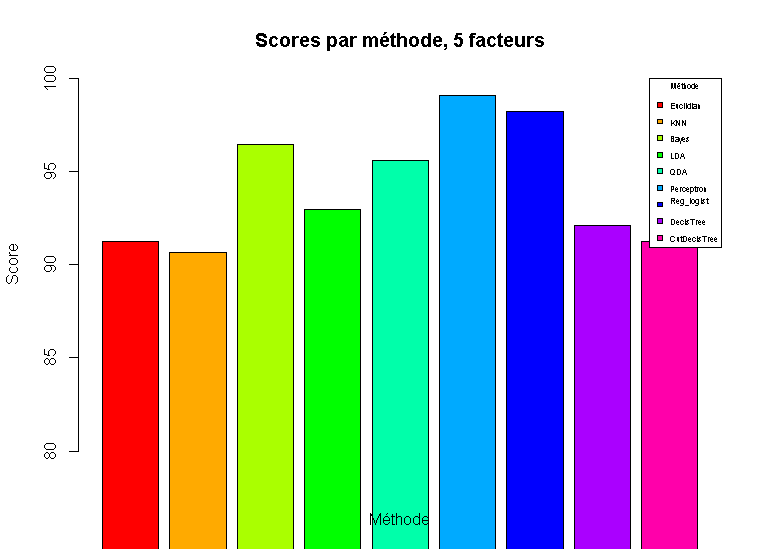


On remarque que de manière générale, la précision des classifieurs varie légèrement lorsque l'on diminue le nombre de facteurs considérés. Lorsque cela s'améliore, on inhibe le "fléaut de la dimension" qui apparait lorsque l'on dispose de trop de dimensions de variables pour trop peu de données d'apprentissages.

...............................................................

###Partie 1 : Quel classifieur pour facteurs triés

Pour rappel seuls 5 facteurs sur les 20 ont été retenues en considérant leur significativité sur la nature de la tumeur : Area_se, Area_worst, Compactness_worst, Concavity_worst, Concavepoint_worst.

Ci dessous un graphique en barre représentant les scores de chaque méthode de classifieur après validation croisée :    

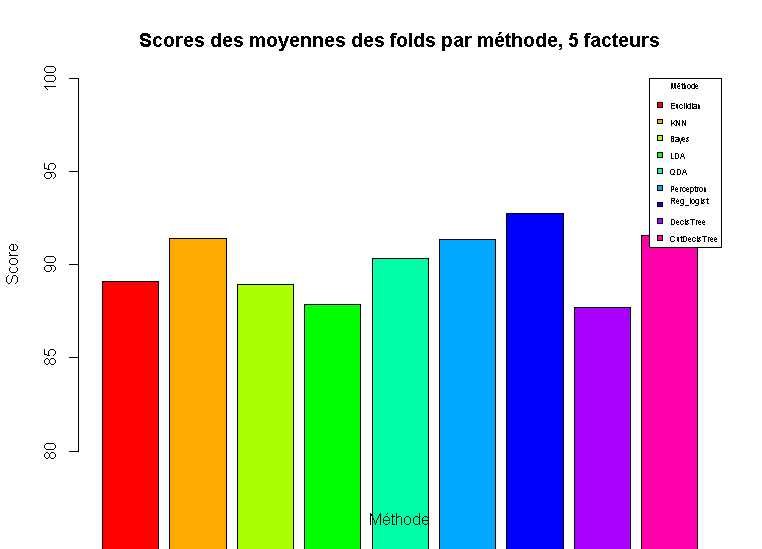

On remarque que le classifieur le plus performant en validation croisée est la régression logistique avec 92,79% de précision.

###Partie 2 : Quel classifieur pour facteurs non triés

Lorsque l'on considère tout les facteurs, et que l'on effectue le même processus de validation croisée, on obtient cette fois-ci le graphique suivant :

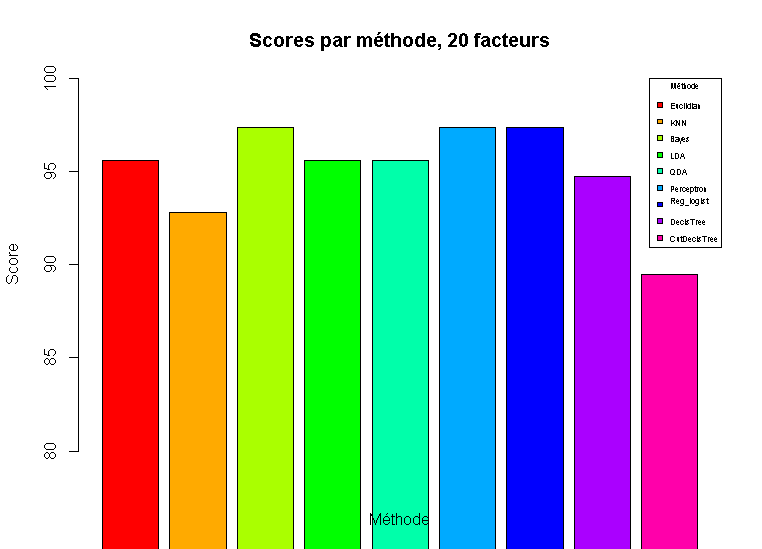

Cette fois-ci le classifieur le plus performant en validation croisée est le classifieur QDA avec 93,67% de précision.

###Partie 3 : Quel classifieur si la fonction de perte est considérée

Notons dans un premier temps que la prise en compte de la fonction de perte dans le calcul de la précision (accuracy) des classifieurs n'a aucune influence pour la plupart des classifieurs. De plus nous avons été dans l'incapacité d'intégrer ce calcul de fonction de perte dans le cas de la régression logistique et du KNN. L'analyse qui va suivre ne considèrera donc pas ces classifieurs.

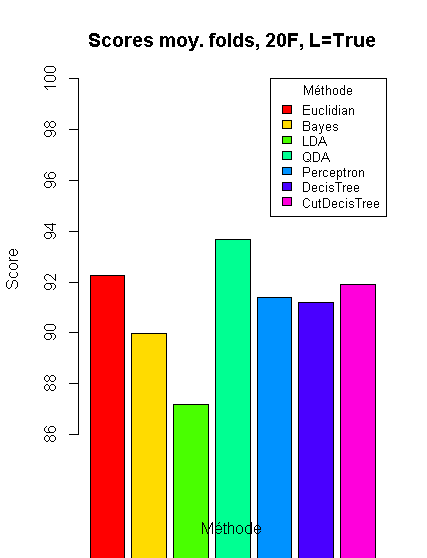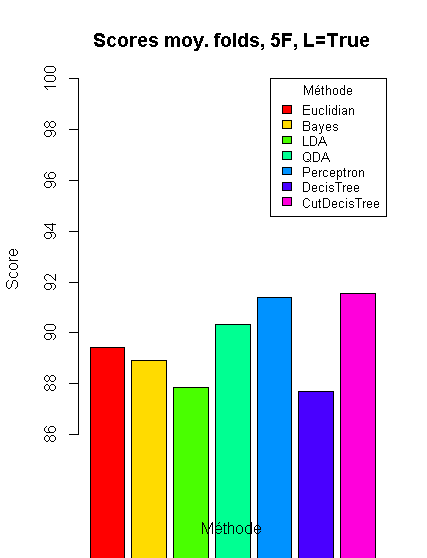

Ainsi on observe sur ces graphs en validation croisée que seuls les précisions du classifieur Euclidien varie avec l'intégration de la fonction de perte, en diminuant légèrement. Ainsi à 20 facteurs, le classifieur optimal reste le QDA à 93,67% de précision. Cependant puisque le classifieur régression logistique n'est plus considéré, le nouveau classifieur le plus performant à 5 facteurs devient le classifieur arbre de décision élagé avec 91,56% de précision.

# Quel code alors pour avoir une mesure efficace ? On va demander au praticien de donner les 5 variables les plus importantes définient au début de ce rapport. De plus, nous avons vu que dans le cas de ces 5 variables, le classifieur le plus précis est celui de la régression linéaire, voici donc le code :

Vous pouvez tester avec ces données prises sur une photo scanner (celle présenté à la soutenance) qui n'est donc pas dans la base de donnée :
Area_se : 29,43
Area_worst : 554,89
Compactness_worst : 0,8569
Concavity_worst : 0,7003
Concavepoint_worst : 0, 2604



In [ ]:
#Nous avons remis les import nécessaires pour qu'il soit directement appliquable en copier-coller
#ATTENTION : Veuillez créer "NouveauTableaur" dans la section du dessus en exécutant le code du tableau trié
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

def predict_diagnosis(area_se, area_worst, compactness_worst, concavity_worst, concave_points_worst):
    logistic_regression_model = LogisticRegression(random_state=42)
    scaler = StandardScaler()

    data = pd.read_csv("NouveauTableur.csv")
    X_train = data.iloc[:, 1:].to_numpy()
    Y_train = data.iloc[:, 0].to_numpy()

    X_train = scaler.fit_transform(X_train)

    logistic_regression_model.fit(X_train, Y_train)

    new_data = np.array([[area_se, area_worst, compactness_worst, concavity_worst, concave_points_worst]])
    new_data_scaled = scaler.transform(new_data)

    prediction_probabilities = logistic_regression_model.predict_proba(new_data_scaled)

    predicted_diagnosis = logistic_regression_model.predict(new_data_scaled)[0]
    confidence_percentage = prediction_probabilities[0, logistic_regression_model.classes_ == predicted_diagnosis] * 100
    return predicted_diagnosis, confidence_percentage[0]

area_se = float(input("Entrez la valeur de area_se : "))
area_worst = float(input("Entrez la valeur de area_worst : "))
compactness_worst = float(input("Entrez la valeur de compactness_worst : "))
concavity_worst = float(input("Entrez la valeur de concavity_worst : "))
concave_points_worst = float(input("Entrez la valeur de concave_points_worst : "))

result, confidence = predict_diagnosis(area_se, area_worst, compactness_worst, concavity_worst, concave_points_worst)

print("Le diagnostic prédit est :", result)
print("Pourcentage de confiance : {:.2f}%".format(confidence))




### Conclusion & exploitation des résultats :     

Ainsi dans le cadre de notre étude, il semblerait que le classifieur QDA soit le plus performant pour prédire la nature de la tumeur d'une femme au hasard, et ce avec une précision de 93,67% de bonnes prédictions.

Cependant cette précision n'est atteinte que si l'on considère l'ensemble des 20 facteurs de la base de donnée.

Ainsi dans un optique de diminuer le nombre de facteur (réduire le nombre de mesures afin d'optimiser du temps, et rendre le diagnostique plus économique), si l'on ne concerve que les 5 facteurs suivants : Area_se, Area_worst, Compactness_worst, Concavity_worst, Concavepoint_worst, on obtient une précision maximale de 92,79% avec cette fois-ci la régression logistique.

Or, en effectuant un test statistique d'analyse de variance (test de student généralisé), on observe que la différence de précision lors de la validation croisée entre 20 et 5 facteurs n'est pas significative :     

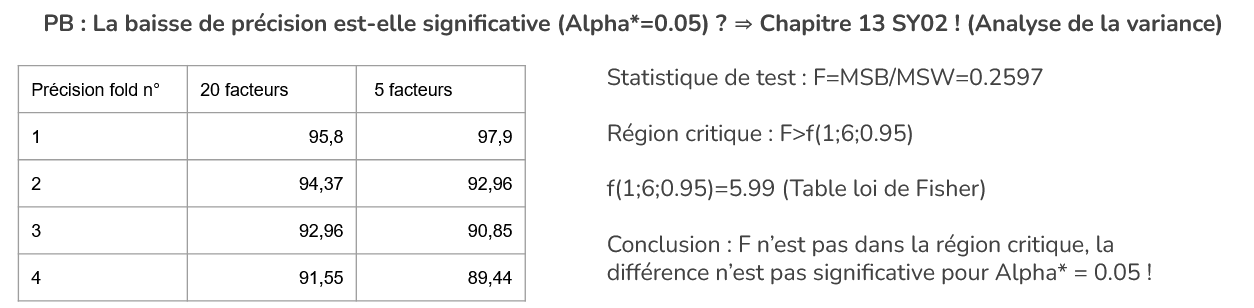

Nous en concluons que dans l'objectif d'effectuer un premier diagnostique, la mesure de ces 5 variables suffisent à prédire, de manière optimale, la nature de la tumeur avec une précision de 92,79% avec le classifieur régression logistique. La prise en compte d'une fonction de perte n'est pas très pertinent dans notre cas puisque les classifieurs séléctionnés n'y sont soit pas sensibles (QDA) soit n'ont pas été considérés(régression logistiques).

Ci dessous un tableau qui récapitue les classifieurs optimaux dans chaque cas, bien que la différence de précision entre 20 et 5 facteurs n'étant pas significative, on préfèrera la solution pour 5 facteurs (lorsque la fonction de perte n'est pas considérée).

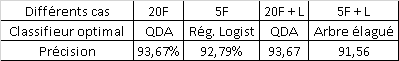




................................................................